In [1]:
%pylab inline
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


In [2]:
properties=pd.read_csv('../input/properties_2016.csv')

/home/bo/anaconda2/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (22,32,34,49,55) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
properties.shape

(2985217, 58)

In [4]:
properties.head()

parcelid  airconditioningtypeid  architecturalstyletypeid  basementsqft  \
0  10754147                    NaN                       NaN           NaN   
1  10759547                    NaN                       NaN           NaN   
2  10843547                    NaN                       NaN           NaN   
3  10859147                    NaN                       NaN           NaN   
4  10879947                    NaN                       NaN           NaN   

   bathroomcnt  bedroomcnt  buildingclasstypeid  buildingqualitytypeid  \
0          0.0         0.0                  NaN                    NaN   
1          0.0         0.0                  NaN                    NaN   
2          0.0         0.0                  NaN                    NaN   
3          0.0         0.0                  3.0                    7.0   
4          0.0         0.0                  4.0                    NaN   

   calculatedbathnbr  decktypeid         ...           numberofstories  \
0                NaN         NaN         ...                       NaN   
1                NaN         NaN         ...                       NaN   
2                NaN         NaN         ...                       NaN   
3                NaN         NaN         ...                       1.0   
4                NaN         NaN         ...                       NaN   

   fireplaceflag  structuretaxvaluedollarcnt  taxvaluedollarcnt  \
0            NaN                         NaN                9.0   
1            NaN                         NaN            27516.0   
2            NaN                    650756.0          1413387.0   
3            NaN                    571346.0          1156834.0   
4            NaN                    193796.0           433491.0   

   assessmentyear  landtaxvaluedollarcnt  taxamount  taxdelinquencyflag  \
0          2015.0                    9.0        NaN                 NaN   
1          2015.0                27516.0        NaN                 NaN   
2          2015.0               762631.0   20800.37                 NaN   
3          2015.0               585488.0   14557.57                 NaN   
4          2015.0               239695.0    5725.17                 NaN   

   taxdelinquencyyear  censustractandblock  
0                 NaN                  NaN  
1                 NaN                  NaN  
2                 NaN                  NaN  
3                 NaN                  NaN  
4                 NaN                  NaN  

[5 rows x 58 columns]

In [11]:
properties.dtypes.sort_values()

parcelid                          int64
pooltypeid10                    float64
pooltypeid2                     float64
pooltypeid7                     float64
propertylandusetypeid           float64
rawcensustractandblock          float64
regionidcity                    float64
regionidcounty                  float64
regionidneighborhood            float64
regionidzip                     float64
roomcnt                         float64
storytypeid                     float64
threequarterbathnbr             float64
typeconstructiontypeid          float64
unitcnt                         float64
yardbuildingsqft17              float64
yardbuildingsqft26              float64
yearbuilt                       float64
numberofstories                 float64
structuretaxvaluedollarcnt      float64
taxvaluedollarcnt               float64
assessmentyear                  float64
landtaxvaluedollarcnt           float64
taxamount                       float64
taxdelinquencyyear              float64


In [5]:
properties.columns[[22,32,34,49,55]]

Index([u'hashottuborspa', u'propertycountylandusecode', u'propertyzoningdesc',
       u'fireplaceflag', u'taxdelinquencyflag'],
      dtype='object')

In [9]:
properties[u'hashottuborspa'].dropna().value_counts()

True    69014
Name: hashottuborspa, dtype: int64

In [16]:
properties[u'propertycountylandusecode'].dropna().value_counts().shape

(240,)

In [20]:
properties[u'propertyzoningdesc'].dropna().value_counts().shape

(5638,)

In [22]:
properties[u'fireplaceflag'].dropna().value_counts() 

True    5163
Name: fireplaceflag, dtype: int64

In [23]:
properties[u'taxdelinquencyflag'].dropna().value_counts() 

Y    56462
Name: taxdelinquencyflag, dtype: int64

In [27]:
properties.isnull().mean(0).sort_values()

parcelid                        0.000000
fips                            0.003831
propertylandusetypeid           0.003831
rawcensustractandblock          0.003831
regionidcounty                  0.003831
longitude                       0.003831
latitude                        0.003831
assessmentyear                  0.003832
bedroomcnt                      0.003836
bathroomcnt                     0.003840
roomcnt                         0.003844
propertycountylandusecode       0.004113
regionidzip                     0.004683
taxamount                       0.010468
taxvaluedollarcnt               0.014254
structuretaxvaluedollarcnt      0.018418
calculatedfinishedsquarefeet    0.018613
yearbuilt                       0.020075
regionidcity                    0.021052
landtaxvaluedollarcnt           0.022689
censustractandblock             0.025166
fullbathcnt                     0.043183
calculatedbathnbr               0.043183
finishedsquarefeet12            0.092467
lotsizesquarefee

In [36]:
properties.parcelid.shape,properties.parcelid.value_counts().shape

((2985217,), (2985217,))

In [2]:
train=pd.read_csv('../input/train_2016.csv')

In [3]:
train.shape

(90811, 3)

In [4]:
train.head()

parcelid  logerror transactiondate
0  11016594    0.0276      2016-01-01
1  14366692   -0.1684      2016-01-01
2  12098116   -0.0040      2016-01-01
3  12643413    0.0218      2016-01-02
4  14432541   -0.0050      2016-01-02

In [6]:
train.logerror.describe()

count    90811.000000
mean         0.010816
std          0.163288
min         -4.605000
25%         -0.026300
50%          0.005000
75%          0.039200
max          4.737000
Name: logerror, dtype: float64

In [10]:
train.logerror.abs().mean(),train.logerror.std()

(0.06931706070851183, 0.16328760928602803)

In [19]:
train.logerror.max()/train.logerror.std(),train.logerror.max()/train.logerror.mean()

(29.010162012368497, 437.9431839769631)

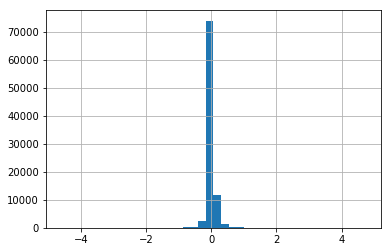

In [7]:
train.logerror.hist(bins=40)

In [29]:
f=lambda u: np.sign(u)*np.power(np.abs(u),1.0/2)
b=f(train.logerror)

In [30]:
b.describe()

count    90811.000000
mean         0.027763
std          0.261815
min         -2.145926
25%         -0.162173
50%          0.070711
75%          0.197990
max          2.176465
Name: logerror, dtype: float64

In [31]:
b.abs().mean(),b.std()

(0.21368174589714647, 0.2618148654952833)

In [32]:
b.max()/b.std(),b.max()/b.mean()

(8.312992540446384, 78.394061393135459)

In [42]:
0.06931706070851183*(1-np.sqrt(0.06314))

0.051899295676264126

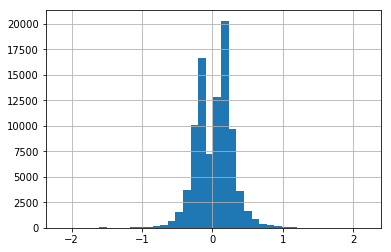

In [33]:
b.hist(bins=40)

In [35]:
train.parcelid.value_counts().shape

(90682,)

In [38]:
#train.parcelid.apply(lambda u: u not in set(properties.parcelid)).sum()

In [50]:
trainids=(set(train.parcelid))

In [51]:
properties['intrain']=properties.parcelid.isin(trainids)

In [40]:
cols=properties.columns

In [81]:
def show(col,nan_val=-100 ):
    def f(v):
        v=v[col]
        r1= v.value_counts()
        #print r
        return r1,r1/float(v.shape[0])
    
    print col
    v = properties[[col,'intrain']]
    v=v.fillna(nan_val)
    cnta,a=f(v)
    cntb,b=f(v[v.intrain])
    cntc,c=f(v[~v.intrain])
    r= pd.concat([a,b,c,b/c,cnta,cntb,cntc],axis=1)
    r.columns=['total','train','non-train' ,'train/non-train','#total','#train','#non-train']
    return r
 

In [82]:
show(cols[1])

airconditioningtypeid


total     train  non-train  train/non-train   #total   #train  \
-100.0  0.728154  0.682980   0.729569         0.936141  2173698  61934.0   
 1.0    0.248680  0.293774   0.247267         1.188082   742364  26640.0   
 3.0    0.000002  0.000011   0.000002         5.319937        7      1.0   
 5.0    0.002946  0.002371   0.002964         0.799851     8795    215.0   
 9.0    0.000006  0.000011   0.000006         1.773312       19      1.0   
 11.0   0.000609  0.000695   0.000606         1.145833     1818     63.0   
 12.0   0.000020       NaN   0.000020              NaN       59      NaN   
 13.0   0.019582  0.020158   0.019564         1.030374    58457   1828.0   

        #non-train  
-100.0     2111764  
 1.0        715724  
 3.0             6  
 5.0          8580  
 9.0            18  
 11.0         1755  
 12.0           59  
 13.0        56629

In [83]:
show(cols[2])

architecturalstyletypeid


total     train     non-train  train/non-train   #total  \
-100.0  9.979697e-01  0.997133  9.979959e-01         0.999135  2979156   
 2.0    6.733179e-05  0.000121  6.564094e-05         1.847978      201   
 3.0    1.942907e-05  0.000044  1.865585e-05         2.364416       58   
 5.0    6.364696e-06       NaN  6.564094e-06              NaN       19   
 7.0    1.759001e-03  0.002426  1.738103e-03         1.395809     5251   
 8.0    1.272939e-04  0.000176  1.257542e-04         1.403060      380   
 10.0   3.349840e-07  0.000011           NaN              NaN        1   
 21.0   5.024760e-05  0.000088  4.905797e-05         1.798288      150   
 27.0   3.349840e-07       NaN  3.454786e-07              NaN        1   

         #train  #non-train  
-100.0  90422.0   2888734.0  
 2.0       11.0       190.0  
 3.0        4.0        54.0  
 5.0        NaN        19.0  
 7.0      220.0      5031.0  
 8.0       16.0       364.0  
 10.0       1.0         NaN  
 21.0       8.0       142.0  
 27.0       NaN         1.0

In [84]:
show(cols[3])

basementsqft


total     train     non-train  train/non-train   #total  \
-100.0   9.994546e-01  0.999526  9.994524e-01         1.000073  2983589   
 20.0    6.699680e-07       NaN  6.909573e-07              NaN        2   
 24.0    3.349840e-07       NaN  3.454786e-07              NaN        1   
 25.0    3.349840e-07       NaN  3.454786e-07              NaN        1   
 30.0    3.349840e-07       NaN  3.454786e-07              NaN        1   
 36.0    6.699680e-07       NaN  6.909573e-07              NaN        2   
 38.0    3.349840e-07       NaN  3.454786e-07              NaN        1   
 42.0    3.349840e-07       NaN  3.454786e-07              NaN        1   
 45.0    6.699680e-07       NaN  6.909573e-07              NaN        2   
 48.0    3.349840e-07       NaN  3.454786e-07              NaN        1   
 50.0    3.349840e-07       NaN  3.454786e-07              NaN        1   
 55.0    3.349840e-07       NaN  3.454786e-07              NaN        1   
 60.0    1.339936e-06       NaN  1.381915e-06              NaN        4   
 63.0    3.349840e-07       NaN  3.454786e-07              NaN        1   
 64.0    1.004952e-06       NaN  1.036436e-06              NaN        3   
 68.0    3.349840e-07       NaN  3.454786e-07              NaN        1   
 69.0    3.349840e-07       NaN  3.454786e-07              NaN        1   
 70.0    6.699680e-07       NaN  6.909573e-07              NaN        2   
 72.0    1.339936e-06       NaN  1.381915e-06              NaN        4   
 73.0    3.349840e-07       NaN  3.454786e-07              NaN        1   
 77.0    3.349840e-07       NaN  3.454786e-07              NaN        1   
 79.0    3.349840e-07       NaN  3.454786e-07              NaN        1   
 80.0    1.674920e-06       NaN  1.727393e-06              NaN        5   
 81.0    2.009904e-06       NaN  2.072872e-06              NaN        6   
 83.0    3.349840e-07       NaN  3.454786e-07              NaN        1   
 84.0    1.004952e-06       NaN  1.036436e-06              NaN        3   
 85.0    3.349840e-07       NaN  3.454786e-07              NaN        1   
 86.0    3.349840e-07       NaN  3.454786e-07              NaN        1   
 88.0    3.349840e-07       NaN  3.454786e-07              NaN        1   
 90.0    2.009904e-06       NaN  2.072872e-06              NaN        6   
...               ...       ...           ...              ...      ...   
 2026.0  3.349840e-07       NaN  3.454786e-07              NaN        1   
 2029.0  3.349840e-07       NaN  3.454786e-07              NaN        1   
 2048.0  3.349840e-07       NaN  3.454786e-07              NaN        1   
 2143.0  3.349840e-07       NaN  3.454786e-07              NaN        1   
 2168.0  3.349840e-07       NaN  3.454786e-07              NaN        1   
 2221.0  3.349840e-07       NaN  3.454786e-07              NaN        1   
 2244.0  3.349840e-07       NaN  3.454786e-07              NaN        1   
 2297.0  3.349840e-07       NaN  3.454786e-07              NaN        1   
 2314.0  3.349840e-07       NaN  3.454786e-07              NaN        1   
 2322.0  3.349840e-07       NaN  3.454786e-07              NaN        1   
 2376.0  3.349840e-07       NaN  3.454786e-07              NaN        1   
 2392.0  3.349840e-07       NaN  3.454786e-07              NaN        1   
 2440.0  3.349840e-07       NaN  3.454786e-07              NaN        1   
 2443.0  3.349840e-07       NaN  3.454786e-07              NaN        1   
 2485.0  3.349840e-07       NaN  3.454786e-07              NaN        1   
 2489.0  3.349840e-07       NaN  3.454786e-07              NaN        1   
 2514.0  3.349840e-07       NaN  3.454786e-07              NaN        1   
 2611.0  3.349840e-07       NaN  3.454786e-07              NaN        1   
 2618.0  3.349840e-07       NaN  3.454786e-07              NaN        1   
 2668.0  3.349840e-07       NaN  3.454786e-07              NaN        1   
 2683.0  3.349840e-07       NaN  3.454786e-07              NaN        1   
 3089.0  3.349840e-07       NaN  3.454786

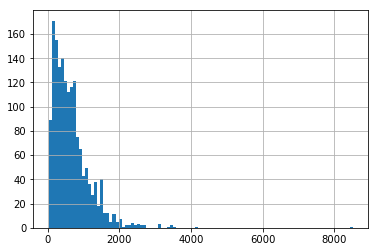

In [85]:
properties[cols[3]].hist(bins=100)

In [86]:
show(cols[4])

bathroomcnt


total     train     non-train  train/non-train   #total  \
-100.00  3.839587e-03  0.005867  3.776081e-03         1.553636    11462   
 0.00    3.906383e-02  0.012781  3.988724e-02         0.320426   116614   
 0.50    5.694728e-06       NaN  5.873137e-06              NaN       17   
 1.00    1.672676e-01  0.165568  1.673208e-01         0.989522   499330   
 1.50    1.537074e-02  0.018074  1.528605e-02         1.182395    45885   
 1.75    1.674920e-06       NaN  1.727393e-06              NaN        5   
 2.00    4.082330e-01  0.402340  4.084176e-01         0.985119  1218664   
 2.50    6.929346e-02  0.089147  6.867148e-02         1.298162   206856   
 3.00    2.108225e-01  0.219669  2.105454e-01         1.043332   629351   
 3.50    1.030243e-02  0.012009  1.024897e-02         1.171727    30755   
 4.00    4.424335e-02  0.041210  4.433838e-02         0.929442   132076   
 4.50    6.370391e-03  0.008745  6.296003e-03         1.388952    19017   
 5.00    1.281012e-02  0.012560  1.281795e-02         0.979905    38241   
 5.50    1.925153e-03  0.002790  1.898060e-03         1.469906     5747   
 6.00    5.444160e-03  0.004929  5.460290e-03         0.902757    16252   
 6.50    4.076756e-04  0.000595  4.017917e-04         1.482080     1217   
 7.00    2.059817e-03  0.001709  2.070799e-03         0.825416     6149   
 7.50    1.272939e-04  0.000099  1.281726e-04         0.774330      380   
 8.00    1.519823e-03  0.001257  1.528052e-03         0.822708     4537   
 8.50    3.550831e-05  0.000011  3.627526e-05         0.303996      106   
 9.00    4.451938e-04  0.000397  4.467039e-04         0.888713     1329   
 9.50    1.674920e-05       NaN  1.727393e-05              NaN       50   
 10.00   1.674920e-04  0.000154  1.679026e-04         0.919495      500   
 10.50   4.019808e-06       NaN  4.145744e-06              NaN       12   
 11.00   6.934169e-05  0.000033  7.047764e-05         0.469406      207   
 11.50   1.004952e-06       NaN  1.036436e-06              NaN        3   
 12.00   8.877077e-05  0.000033  9.051540e-05         0.365492      265   
 12.50   6.699680e-07       NaN  6.909573e-07              NaN        2   
 13.00   1.741917e-05       NaN  1.796489e-05              NaN       52   
 14.00   1.507428e-05       NaN  1.554654e-05              NaN       45   
 14.50   3.349840e-07       NaN  3.454786e-07              NaN        1   
 15.00   8.039617e-06  0.000011  7.946009e-06         1.387810       24   
 16.00   1.004952e-05       NaN  1.036436e-05              NaN       30   
 17.00   2.344888e-06       NaN  2.418350e-06              NaN        7   
 18.00   5.024760e-06       NaN  5.182180e-06              NaN       15   
 19.00   1.004952e-06       NaN  1.036436e-06              NaN        3   
 19.50   3.349840e-07       NaN  3.454786e-07              NaN        1   
 20.00   3.349840e-06  0.000011  3.109308e-06         3.546624       10   

          #train  #non-train  
-100.00    532.0       10930  
 0.00     1159.0      115455  
 0.50        NaN          17  
 1.00    15014.0      484316  
 1.50     1639.0       44246  
 1.75        NaN           5  
 2.00    36485.0     1182179  
 2.50     8084.0      198772  
 3.00    19920.0      609431  
 3.50     1089.0       29666  
 4.00     3737.0      128339  
 4.50      793.0       18224  
 5.00     1139.0       37102  
 5.50      253.0        5494  
 6.00      447.0       15805  
 6.50       54.0        1163  
 7.00      155.0        5994  
 7.50        9.0         371  
 8.00      114.0        4423  
 8.50        1.0         105  
 9.00       36.0        1293  
 9.50        NaN          50  
 10.00      14.0         486  
 10.50       NaN          12  
 11.00       3.0         204  
 11.50       NaN           3  
 12.00       3.0         262  
 12.50       NaN           2  
 13.00       NaN          52  
 14.00       NaN          45  
 14.50       NaN           1  
 15.00       1.0          23  
 16.00       NaN          30  
 17.00       NaN           7  
 18.0

In [87]:
show(cols[5])

bedroomcnt


total     train  non-train  train/non-train   #total   #train  \
-100.0  0.003836  0.005867   0.003772         1.555343    11450    532.0   
 0.0    0.040689  0.015593   0.041475         0.375957   121466   1414.0   
 1.0    0.029013  0.042919   0.028577         1.501864    86610   3892.0   
 2.0    0.202788  0.246212   0.201428         1.222334   605367  22327.0   
 3.0    0.391751  0.390397   0.391794         0.996436  1169462  35402.0   
 4.0    0.243551  0.223363   0.244183         0.914735   727052  20255.0   
 5.0    0.060706  0.055888   0.060857         0.918336   181222   5068.0   
 6.0    0.016268  0.012307   0.016392         0.750781    48563   1116.0   
 7.0    0.004269  0.002580   0.004322         0.597058    12744    234.0   
 8.0    0.004541  0.003011   0.004589         0.656080    13555    273.0   
 9.0    0.001438  0.001004   0.001452         0.691263     4293     91.0   
 10.0   0.000578  0.000386   0.000584         0.660666     1726     35.0   
 11.0   0.000147  0.000132   0.000148         0.897039      439     12.0   
 12.0   0.000329  0.000243   0.000331         0.732254      981     22.0   
 13.0   0.000030  0.000011   0.000030         0.362723       89      1.0   
 14.0   0.000024  0.000033   0.000024         1.367984       73      3.0   
 15.0   0.000009  0.000011   0.000009         1.276785       26      1.0   
 16.0   0.000022  0.000044   0.000021         2.093090       65      4.0   
 17.0   0.000003       NaN   0.000003              NaN        8      NaN   
 18.0   0.000003       NaN   0.000003              NaN       10      NaN   
 19.0   0.000001       NaN   0.000001              NaN        3      NaN   
 20.0   0.000004       NaN   0.000004              NaN       13      NaN   

        #non-train  
-100.0       10918  
 0.0        120052  
 1.0         82718  
 2.0        583040  
 3.0       1134060  
 4.0        706797  
 5.0        176154  
 6.0         47447  
 7.0         12510  
 8.0         13282  
 9.0          4202  
 10.0         1691  
 11.0          427  
 12.0          959  
 13.0           88  
 14.0           70  
 15.0           25  
 16.0           61  
 17.0            8  
 18.0           10  
 19.0            3  
 20.0           13

In [88]:
show(cols[6])

buildingclasstypeid


total     train  non-train  train/non-train   #total   #train  \
-100.0  0.995769  0.999824   0.995642         1.004199  2972588  90666.0   
 1.0    0.000022       NaN   0.000022              NaN       65      NaN   
 2.0    0.000027       NaN   0.000028              NaN       81      NaN   
 3.0    0.001059       NaN   0.001092              NaN     3161      NaN   
 4.0    0.003104  0.000176   0.003195         0.055218     9265     16.0   
 5.0    0.000019       NaN   0.000020              NaN       57      NaN   

        #non-train  
-100.0     2881922  
 1.0            65  
 2.0            81  
 3.0          3161  
 4.0          9249  
 5.0            57

In [89]:
show(cols[7])

buildingqualitytypeid


total     train     non-train  train/non-train   #total  \
-100.0  3.506375e-01  0.368298  3.500842e-01         1.052027  1046729   
 1.0    2.327034e-02  0.028914  2.309352e-02         1.252049    69467   
 2.0    6.699680e-07       NaN  6.909573e-07              NaN        2   
 3.0    2.009904e-06       NaN  2.072872e-06              NaN        6   
 4.0    2.318625e-01  0.262544  2.309013e-01         1.137039   692160   
 5.0    7.034664e-06       NaN  7.255051e-06              NaN       21   
 6.0    3.148850e-05  0.000022  3.178403e-05         0.693905       94   
 7.0    3.796166e-01  0.322765  3.813977e-01         0.846270  1133238   
 8.0    1.708419e-05  0.000055  1.589202e-05         3.469524       51   
 9.0    8.374601e-06       NaN  8.636966e-06              NaN       25   
 10.0   1.330322e-02  0.016078  1.321629e-02         1.216542    39713   
 11.0   6.364696e-06  0.000011  6.218615e-06         1.773312       19   
 12.0   1.236761e-03  0.001312  1.234395e-03         1.063094     3692   

         #train  #non-train  
-100.0  33398.0     1013331  
 1.0     2622.0       66845  
 2.0        NaN           2  
 3.0        NaN           6  
 4.0    23808.0      668352  
 5.0        NaN          21  
 6.0        2.0          92  
 7.0    29269.0     1103969  
 8.0        5.0          46  
 9.0        NaN          25  
 10.0    1458.0       38255  
 11.0       1.0          18  
 12.0     119.0        3573

In [94]:
show(cols[8]).dropna()

calculatedbathnbr


total     train  non-train  train/non-train   #total   #train  \
-100.0  0.043183  0.018835   0.043946         0.428593   128912   1708.0   
 1.0    0.167265  0.165568   0.167318         0.989538   499322  15014.0   
 1.5    0.015263  0.018019   0.015177         1.187267    45564   1634.0   
 2.0    0.408229  0.402340   0.408413         0.985129  1218652  36485.0   
 2.5    0.069195  0.089069   0.068573         1.298907   206563   8077.0   
 3.0    0.210823  0.219669   0.210545         1.043332   629351  19920.0   
 3.5    0.010274  0.011976   0.010220         1.171778    30669   1086.0   
 4.0    0.044243  0.041210   0.044338         0.929442   132076   3737.0   
 4.5    0.006351  0.008723   0.006277         1.389719    18959    791.0   
 5.0    0.012810  0.012560   0.012818         0.979905    38241   1139.0   
 5.5    0.001920  0.002790   0.001893         1.474199     5731    253.0   
 6.0    0.005444  0.004929   0.005460         0.902757    16252    447.0   
 6.5    0.000403  0.000595   0.000397         1.498834     1204     54.0   
 7.0    0.002060  0.001709   0.002071         0.825416     6149    155.0   
 7.5    0.000126  0.000099   0.000127         0.780643      377      9.0   
 8.0    0.001520  0.001257   0.001528         0.822708     4537    114.0   
 8.5    0.000034  0.000011   0.000035         0.316036      102      1.0   
 9.0    0.000445  0.000397   0.000447         0.888713     1329     36.0   
 10.0   0.000167  0.000154   0.000168         0.919495      500     14.0   
 11.0   0.000069  0.000033   0.000070         0.469406      207      3.0   
 12.0   0.000089  0.000033   0.000091         0.365492      265      3.0   
 15.0   0.000008  0.000011   0.000008         1.387810       24      1.0   
 20.0   0.000003  0.000011   0.000003         3.546624       10      1.0   

        #non-train  
-100.0      127204  
 1.0        484308  
 1.5         43930  
 2.0       1182167  
 2.5        198486  
 3.0        609431  
 3.5         29583  
 4.0        128339  
 4.5         18168  
 5.0         37102  
 5.5          5478  
 6.0         15805  
 6.5          1150  
 7.0          5994  
 7.5           368  
 8.0          4423  
 8.5           101  
 9.0          1293  
 10.0          486  
 11.0          204  
 12.0          262  
 15.0           23  
 20.0            9

In [91]:
show(cols[9])

decktypeid


total     train  non-train  train/non-train   #total  #train  \
-100.0  0.994273  0.992744   0.994321         0.998414  2968121   90024   
 66.0   0.005727  0.007256   0.005679         1.277717    17096     658   

        #non-train  
-100.0     2878097  
 66.0        16438

In [95]:
show(cols[10]).dropna()

finishedfloor1squarefeet


total     train     non-train  train/non-train   #total  \
-100.0   9.320930e-01  0.924461  9.323321e-01         0.991558  2782500   
 44.0    3.349840e-06  0.000011  3.109308e-06         3.546624       10   
 47.0    1.272939e-05  0.000011  1.278271e-05         0.862692       38   
 49.0    1.272939e-05  0.000044  1.174627e-05         3.755249       38   
 61.0    8.039617e-06  0.000044  6.909573e-06         6.383924       24   
 63.0    1.071949e-05  0.000033  1.001888e-05         3.302030       32   
 64.0    2.311390e-05  0.000033  2.280159e-05         1.450892       69   
 66.0    5.694728e-06  0.000011  5.527658e-06         1.994976       17   
 69.0    1.172444e-05  0.000055  1.036436e-05         5.319937       35   
 79.0    1.406933e-05  0.000066  1.243723e-05         5.319937       42   
 96.0    1.239441e-05  0.000011  1.243723e-05         0.886656       37   
 99.0    6.364696e-06  0.000011  6.218615e-06         1.773312       19   
 101.0   7.034664e-06  0.000022  6.564094e-06         3.359960       21   
 105.0   1.775415e-05  0.000077  1.589202e-05         4.857334       53   
 107.0   3.014856e-06  0.000022  2.418350e-06         9.119891        9   
 109.0   1.172444e-05  0.000055  1.036436e-05         5.319937       35   
 117.0   1.004952e-05  0.000022  9.673402e-06         2.279973       30   
 126.0   3.349840e-06  0.000011  3.109308e-06         3.546624       10   
 132.0   4.689776e-06  0.000011  4.491222e-06         2.455355       14   
 133.0   2.679872e-06  0.000011  2.418350e-06         4.559946        8   
 136.0   3.014856e-06  0.000011  2.763829e-06         3.989953        9   
 146.0   1.272939e-05  0.000011  1.278271e-05         0.862692       38   
 157.0   4.354792e-06  0.000011  4.145744e-06         2.659968       13   
 160.0   1.574425e-05  0.000022  1.554654e-05         1.418650       47   
 195.0   1.339936e-06  0.000011  1.036436e-06        10.639873        4   
 200.0   1.004952e-06  0.000011  6.909573e-07        15.959810        3   
 219.0   6.029712e-06  0.000022  5.527658e-06         3.989953       18   
 235.0   4.689776e-06  0.000011  4.491222e-06         2.455355       14   
 240.0   3.014856e-06  0.000011  2.763829e-06         3.989953        9   
 255.0   6.029712e-06  0.000022  5.527658e-06         3.989953       18   
...               ...       ...           ...              ...      ...   
 3948.0  1.004952e-06  0.000011  6.909573e-07        15.959810        3   
 3951.0  6.699680e-07  0.000011  3.454786e-07        31.919620        2   
 3973.0  6.699680e-07  0.000011  3.454786e-07        31.919620        2   
 4007.0  1.038450e-05  0.000011  1.036436e-05         1.063987       31   
 4037.0  6.699680e-07  0.000011  3.454786e-07        31.919620        2   
 4088.0  1.004952e-06  0.000011  6.909573e-07        15.959810        3   
 4117.0  1.339936e-06  0.000011  1.036436e-06        10.639873        4   
 4150.0  6.699680e-07  0.000011  3.454786e-07        31.919620        2   
 4165.0  1.004952e-06  0.000011  6.909573e-07        15.959810        3   
 4185.0  6.699680e-07  0.000011  3.454786e-07        31.919620        2   
 4194.0  6.699680e-07  0.000011  3.454786e-07        31.919620        2   
 4205.0  1.339936e-06  0.000011  1.036436e-06        10.639873        4   
 4221.0  6.699680e-07  0.000011  3.454786e-07        31.919620        2   
 4240.0  1.004952e-06  0.000011  6.909573e-07        15.959810        3   
 4244.0  1.339936e-06  0.000011  1.036436e-06        10.639873        4   
 4291.0  1.004952e-06  0.000011  6.909573e-07        15.959810        3   
 4316.0  6.699680e-07  0.000011  3.454786e-07        31.919620        2   
 4327.0  1.004952e-06  0.000011  6.909573e-07        15.959810        3   
 4342.0  6.699680e-07  0.000011  3.454786e-07        31.919620        2   
 4373.0  6.699680e-07  0.000011  3.454786e-07        31.919620        2   
 4425.0  5.694728e-06  0.000022  5.182180e-06         4.255949       17   
 4547.0  1.339936e-06  0.000011  1.036436

In [96]:
show(cols[11]).dropna()

calculatedfinishedsquarefeet


total     train     non-train  train/non-train  #total  \
-100.0    1.861339e-02  0.013123  1.878540e-02         0.698563   55565   
 2.0      1.674920e-06  0.000011  1.381915e-06         7.979905       5   
 40.0     4.354792e-06  0.000011  4.145744e-06         2.659968      13   
 120.0    8.039617e-06  0.000022  7.600530e-06         2.901784      24   
 152.0    1.004952e-06  0.000011  6.909573e-07        15.959810       3   
 160.0    7.034664e-06  0.000011  6.909573e-06         1.595981      21   
 199.0    6.699680e-07  0.000011  3.454786e-07        31.919620       2   
 200.0    1.540927e-05  0.000011  1.554654e-05         0.709325      46   
 214.0    6.699680e-07  0.000011  3.454786e-07        31.919620       2   
 230.0    2.009904e-06  0.000011  1.727393e-06         6.383924       6   
 242.0    4.689776e-06  0.000011  4.491222e-06         2.455355      14   
 257.0    1.339936e-06  0.000011  1.036436e-06        10.639873       4   
 270.0    1.674920e-06  0.000011  1.381915e-06         7.979905       5   
 280.0    1.976406e-05  0.000011  2.003776e-05         0.550338      59   
 296.0    4.354792e-06  0.000011  4.145744e-06         2.659968      13   
 300.0    1.004952e-05  0.000022  9.673402e-06         2.279973      30   
 304.0    4.689776e-06  0.000033  3.800265e-06         8.705351      14   
 310.0    2.344888e-06  0.000011  2.072872e-06         5.319937       7   
 319.0    3.014856e-06  0.000011  2.763829e-06         3.989953       9   
 320.0    3.282843e-05  0.000011  3.351143e-05         0.329068      98   
 322.0    2.344888e-06  0.000011  2.072872e-06         5.319937       7   
 324.0    1.339936e-05  0.000011  1.347367e-05         0.818452      40   
 332.0    6.699680e-07  0.000011  3.454786e-07        31.919620       2   
 342.0    7.369649e-06  0.000022  6.909573e-06         3.191962      22   
 352.0    1.205942e-05  0.000011  1.209175e-05         0.911989      36   
 355.0    5.694728e-06  0.000011  5.527658e-06         1.994976      17   
 358.0    9.379553e-06  0.000044  8.291487e-06         5.319937      28   
 360.0    7.436645e-05  0.000033  7.565982e-05         0.437255     222   
 368.0    1.741917e-05  0.000044  1.658297e-05         2.659968      52   
 370.0    1.172444e-05  0.000011  1.174627e-05         0.938812      35   
...                ...       ...           ...              ...     ...   
 8720.0   1.004952e-06  0.000011  6.909573e-07        15.959810       3   
 8734.0   1.339936e-06  0.000011  1.036436e-06        10.639873       4   
 8772.0   1.004952e-06  0.000011  6.909573e-07        15.959810       3   
 8903.0   1.004952e-06  0.000011  6.909573e-07        15.959810       3   
 8936.0   6.699680e-07  0.000011  3.454786e-07        31.919620       2   
 9101.0   1.339936e-06  0.000011  1.036436e-06        10.639873       4   
 9130.0   1.339936e-06  0.000011  1.036436e-06        10.639873       4   
 9143.0   1.339936e-06  0.000011  1.036436e-06        10.639873       4   
 9166.0   6.699680e-07  0.000011  3.454786e-07        31.919620       2   
 9216.0   6.699680e-07  0.000011  3.454786e-07        31.919620       2   
 9302.0   1.674920e-06  0.000011  1.381915e-06         7.979905       5   
 9385.0   1.674920e-06  0.000011  1.381915e-06         7.979905       5   
 9408.0   1.674920e-06  0.000011  1.381915e-06         7.979905       5   
 9414.0   6.699680e-07  0.000011  3.454786e-07        31.919620       2   
 9467.0   6.699680e-07  0.000011  3.454786e-07        31.919620       2   
 9642.0   6.699680e-07  0.000011  3.454786e-07        31.919620       2   
 9670.0   6.699680e-07  0.000011  3.454786e-07        31.919620       2   
 9740.0   6.699680e-07  0.000011  3.454786e-07        31.919620       2   
 9757.0   1.004952e-06  0.000011  6.909573e-07        15.959810       3   
 9909.0   6.699680e-07  0.000011  3.454786e-07        31.919620       2   
 9961.0   6.699680e-07  0.000011  3.454786e-07        31.919620       2   
 10046.0  6.699680e-07  0.000011  3.454786

In [97]:
show(cols[12]).dropna()

finishedsquarefeet12


total     train     non-train  train/non-train  #total  \
-100.0    9.246664e-02  0.057310  9.356805e-02         0.612497  276033   
 2.0      1.674920e-06  0.000011  1.381915e-06         7.979905       5   
 40.0     4.354792e-06  0.000011  4.145744e-06         2.659968      13   
 120.0    7.369649e-06  0.000022  6.909573e-06         3.191962      22   
 152.0    1.004952e-06  0.000011  6.909573e-07        15.959810       3   
 160.0    7.034664e-06  0.000011  6.909573e-06         1.595981      21   
 199.0    6.699680e-07  0.000011  3.454786e-07        31.919620       2   
 200.0    1.306438e-05  0.000011  1.312819e-05         0.839990      39   
 214.0    6.699680e-07  0.000011  3.454786e-07        31.919620       2   
 230.0    2.009904e-06  0.000011  1.727393e-06         6.383924       6   
 242.0    4.689776e-06  0.000011  4.491222e-06         2.455355      14   
 270.0    1.674920e-06  0.000011  1.381915e-06         7.979905       5   
 280.0    1.205942e-05  0.000011  1.209175e-05         0.911989      36   
 296.0    4.019808e-06  0.000011  3.800265e-06         2.901784      12   
 300.0    8.039617e-06  0.000011  7.946009e-06         1.387810      24   
 304.0    4.689776e-06  0.000033  3.800265e-06         8.705351      14   
 310.0    2.009904e-06  0.000011  1.727393e-06         6.383924       6   
 319.0    3.014856e-06  0.000011  2.763829e-06         3.989953       9   
 320.0    2.244393e-05  0.000011  2.280159e-05         0.483631      67   
 322.0    2.344888e-06  0.000011  2.072872e-06         5.319937       7   
 324.0    1.205942e-05  0.000011  1.209175e-05         0.911989      36   
 342.0    7.034664e-06  0.000022  6.564094e-06         3.359960      21   
 352.0    1.071949e-05  0.000011  1.070984e-05         1.029665      32   
 355.0    5.694728e-06  0.000011  5.527658e-06         1.994976      17   
 358.0    9.379553e-06  0.000044  8.291487e-06         5.319937      28   
 360.0    6.666182e-05  0.000022  6.805929e-05         0.324057     199   
 368.0    1.641422e-05  0.000044  1.554654e-05         2.837300      49   
 370.0    1.071949e-05  0.000011  1.070984e-05         1.029665      32   
 371.0    1.172444e-05  0.000011  1.174627e-05         0.938812      35   
 377.0    8.709585e-06  0.000022  8.291487e-06         2.659968      26   
...                ...       ...           ...              ...     ...   
 8602.0   6.699680e-07  0.000011  3.454786e-07        31.919620       2   
 8625.0   1.674920e-06  0.000011  1.381915e-06         7.979905       5   
 8679.0   6.699680e-07  0.000011  3.454786e-07        31.919620       2   
 8720.0   1.004952e-06  0.000011  6.909573e-07        15.959810       3   
 8734.0   1.004952e-06  0.000011  6.909573e-07        15.959810       3   
 8772.0   6.699680e-07  0.000011  3.454786e-07        31.919620       2   
 8903.0   1.004952e-06  0.000011  6.909573e-07        15.959810       3   
 8936.0   6.699680e-07  0.000011  3.454786e-07        31.919620       2   
 9101.0   1.339936e-06  0.000011  1.036436e-06        10.639873       4   
 9130.0   1.004952e-06  0.000011  6.909573e-07        15.959810       3   
 9143.0   1.339936e-06  0.000011  1.036436e-06        10.639873       4   
 9166.0   6.699680e-07  0.000011  3.454786e-07        31.919620       2   
 9216.0   6.699680e-07  0.000011  3.454786e-07        31.919620       2   
 9302.0   1.339936e-06  0.000011  1.036436e-06        10.639873       4   
 9385.0   1.674920e-06  0.000011  1.381915e-06         7.979905       5   
 9408.0   1.339936e-06  0.000011  1.036436e-06        10.639873       4   
 9414.0   6.699680e-07  0.000011  3.454786e-07        31.919620       2   
 9467.0   6.699680e-07  0.000011  3.454786e-07        31.919620       2   
 9642.0   6.699680e-07  0.000011  3.454786e-07        31.919620       2   
 9670.0   6.699680e-07  0.000011  3.454786e-07        31.919620       2   
 9740.0   6.699680e-07  0.000011  3.454786e-07        31.919620       2   
 9757.0   6.699680e-07  0.000011  3.454786

In [98]:
show(cols[13]).dropna()

finishedsquarefeet13


total     train  non-train  train/non-train   #total   #train  \
-100.0   0.997430  0.999636   0.997361         1.002281  2977545  90649.0   
 1056.0  0.000040  0.000011   0.000041         0.268232      120      1.0   
 1152.0  0.000082  0.000011   0.000084         0.130818      245      1.0   
 1248.0  0.000152  0.000033   0.000155         0.212797      453      3.0   
 1344.0  0.000238  0.000033   0.000244         0.135636      709      3.0   
 1392.0  0.000029  0.000022   0.000029         0.751050       87      2.0   
 1416.0  0.000001  0.000011   0.000001        10.639873        4      1.0   
 1440.0  0.000526  0.000187   0.000537         0.349185     1571     17.0   
 1464.0  0.000009  0.000011   0.000009         1.276785       26      1.0   
 1536.0  0.000119  0.000022   0.000122         0.180848      355      2.0   
 1566.0  0.000011  0.000011   0.000011         1.029665       32      1.0   
 1584.0  0.000007  0.000011   0.000007         1.519982       22      1.0   

         #non-train  
-100.0      2886896  
 1056.0         119  
 1152.0         244  
 1248.0         450  
 1344.0         706  
 1392.0          85  
 1416.0           3  
 1440.0        1554  
 1464.0          25  
 1536.0         353  
 1566.0          31  
 1584.0          21

In [99]:
show(cols[14]).dropna()

finishedsquarefeet15


total     train     non-train  train/non-train   #total  \
-100.0   9.360857e-01  0.960797  9.353115e-01         1.027248  2794419   
 560.0   2.009904e-06  0.000011  1.727393e-06         6.383924        6   
 700.0   1.674920e-06  0.000011  1.381915e-06         7.979905        5   
 716.0   1.339936e-06  0.000011  1.036436e-06        10.639873        4   
 759.0   6.699680e-07  0.000011  3.454786e-07        31.919620        2   
 776.0   1.674920e-06  0.000011  1.381915e-06         7.979905        5   
 792.0   6.699680e-06  0.000011  6.564094e-06         1.679980       20   
 798.0   1.339936e-06  0.000011  1.036436e-06        10.639873        4   
 847.0   6.699680e-07  0.000011  3.454786e-07        31.919620        2   
 858.0   4.354792e-06  0.000011  4.145744e-06         2.659968       13   
 884.0   6.029712e-06  0.000011  5.873137e-06         1.877625       18   
 902.0   3.684824e-06  0.000011  3.454786e-06         3.191962       11   
 912.0   8.374601e-06  0.000011  8.291487e-06         1.329984       25   
 926.0   2.009904e-06  0.000011  1.727393e-06         6.383924        6   
 931.0   3.684824e-06  0.000011  3.454786e-06         3.191962       11   
 932.0   6.029712e-06  0.000011  5.873137e-06         1.877625       18   
 936.0   1.942907e-05  0.000033  1.900132e-05         1.741070       58   
 937.0   6.699680e-07  0.000011  3.454786e-07        31.919620        2   
 939.0   1.674920e-06  0.000011  1.381915e-06         7.979905        5   
 952.0   8.709585e-06  0.000011  8.636966e-06         1.276785       26   
 960.0   4.053307e-05  0.000033  4.076648e-05         0.811516      121   
 973.0   6.699680e-07  0.000011  3.454786e-07        31.919620        2   
 976.0   9.379553e-06  0.000011  9.327923e-06         1.182208       28   
 980.0   6.699680e-06  0.000011  6.564094e-06         1.679980       20   
 984.0   1.306438e-05  0.000022  1.278271e-05         1.725385       39   
 985.0   1.004952e-06  0.000011  6.909573e-07        15.959810        3   
 990.0   8.374601e-06  0.000011  8.291487e-06         1.329984       25   
 996.0   7.034664e-06  0.000011  6.909573e-06         1.595981       21   
 1000.0  2.746869e-05  0.000022  2.763829e-05         0.797991       82   
 1002.0  5.359744e-06  0.000011  5.182180e-06         2.127975       16   
...               ...       ...           ...              ...      ...   
 5564.0  1.674920e-06  0.000011  1.381915e-06         7.979905        5   
 5617.0  1.004952e-06  0.000011  6.909573e-07        15.959810        3   
 5650.0  1.674920e-06  0.000011  1.381915e-06         7.979905        5   
 5660.0  2.009904e-06  0.000011  1.727393e-06         6.383924        6   
 5676.0  2.009904e-06  0.000011  1.727393e-06         6.383924        6   
 5677.0  1.004952e-06  0.000011  6.909573e-07        15.959810        3   
 5764.0  1.339936e-06  0.000011  1.036436e-06        10.639873        4   
 5776.0  1.004952e-06  0.000011  6.909573e-07        15.959810        3   
 5780.0  2.344888e-06  0.000011  2.072872e-06         5.319937        7   
 5840.0  2.344888e-06  0.000011  2.072872e-06         5.319937        7   
 5860.0  1.339936e-06  0.000011  1.036436e-06        10.639873        4   
 5871.0  1.004952e-06  0.000011  6.909573e-07        15.959810        3   
 5878.0  1.004952e-06  0.000011  6.909573e-07        15.959810        3   
 5908.0  6.699680e-07  0.000011  3.454786e-07        31.919620        2   
 5944.0  1.339936e-06  0.000011  1.036436e-06        10.639873        4   
 5983.0  1.004952e-06  0.000011  6.909573e-07        15.959810        3   
 6000.0  1.038450e-05  0.000011  1.036436e-05         1.063987       31   
 6046.0  1.339936e-06  0.000022  6.909573e-07        31.919620        4   
 6072.0  6.699680e-07  0.000011  3.454786e-07        31.919620        2   
 6093.0  1.339936e-06  0.000011  1.036436e-06        10.639873        4   
 6298.0  1.004952e-06  0.000011  6.909573e-07        15.959810        3   
 6302.0  1.339936e-06  0.000011  1.036436

In [100]:
show(cols[15]).dropna()

finishedsquarefeet50


total     train     non-train  train/non-train   #total  \
-100.0   9.320930e-01  0.924461  9.323321e-01         0.991558  2782500   
 44.0    3.349840e-06  0.000011  3.109308e-06         3.546624       10   
 47.0    1.272939e-05  0.000011  1.278271e-05         0.862692       38   
 49.0    1.272939e-05  0.000044  1.174627e-05         3.755249       38   
 61.0    8.039617e-06  0.000044  6.909573e-06         6.383924       24   
 63.0    1.071949e-05  0.000033  1.001888e-05         3.302030       32   
 64.0    2.311390e-05  0.000033  2.280159e-05         1.450892       69   
 66.0    5.694728e-06  0.000011  5.527658e-06         1.994976       17   
 69.0    1.172444e-05  0.000055  1.036436e-05         5.319937       35   
 79.0    1.406933e-05  0.000066  1.243723e-05         5.319937       42   
 96.0    1.239441e-05  0.000011  1.243723e-05         0.886656       37   
 99.0    6.364696e-06  0.000011  6.218615e-06         1.773312       19   
 101.0   7.034664e-06  0.000022  6.564094e-06         3.359960       21   
 105.0   1.708419e-05  0.000077  1.520106e-05         5.078121       51   
 107.0   3.014856e-06  0.000022  2.418350e-06         9.119891        9   
 109.0   1.172444e-05  0.000055  1.036436e-05         5.319937       35   
 117.0   1.004952e-05  0.000022  9.673402e-06         2.279973       30   
 126.0   3.349840e-06  0.000011  3.109308e-06         3.546624       10   
 132.0   4.689776e-06  0.000011  4.491222e-06         2.455355       14   
 133.0   2.679872e-06  0.000011  2.418350e-06         4.559946        8   
 136.0   3.014856e-06  0.000011  2.763829e-06         3.989953        9   
 146.0   1.272939e-05  0.000011  1.278271e-05         0.862692       38   
 157.0   4.354792e-06  0.000011  4.145744e-06         2.659968       13   
 160.0   1.574425e-05  0.000022  1.554654e-05         1.418650       47   
 195.0   1.339936e-06  0.000011  1.036436e-06        10.639873        4   
 200.0   1.004952e-06  0.000011  6.909573e-07        15.959810        3   
 219.0   6.029712e-06  0.000022  5.527658e-06         3.989953       18   
 235.0   4.689776e-06  0.000011  4.491222e-06         2.455355       14   
 240.0   3.014856e-06  0.000011  2.763829e-06         3.989953        9   
 255.0   6.029712e-06  0.000022  5.527658e-06         3.989953       18   
...               ...       ...           ...              ...      ...   
 4150.0  6.699680e-07  0.000011  3.454786e-07        31.919620        2   
 4165.0  1.004952e-06  0.000011  6.909573e-07        15.959810        3   
 4185.0  6.699680e-07  0.000011  3.454786e-07        31.919620        2   
 4194.0  6.699680e-07  0.000011  3.454786e-07        31.919620        2   
 4205.0  1.339936e-06  0.000011  1.036436e-06        10.639873        4   
 4221.0  6.699680e-07  0.000011  3.454786e-07        31.919620        2   
 4240.0  1.674920e-06  0.000011  1.381915e-06         7.979905        5   
 4244.0  1.339936e-06  0.000011  1.036436e-06        10.639873        4   
 4291.0  1.004952e-06  0.000011  6.909573e-07        15.959810        3   
 4316.0  6.699680e-07  0.000011  3.454786e-07        31.919620        2   
 4327.0  1.004952e-06  0.000011  6.909573e-07        15.959810        3   
 4342.0  6.699680e-07  0.000011  3.454786e-07        31.919620        2   
 4364.0  6.699680e-07  0.000011  3.454786e-07        31.919620        2   
 4373.0  6.699680e-07  0.000011  3.454786e-07        31.919620        2   
 4425.0  5.694728e-06  0.000022  5.182180e-06         4.255949       17   
 4546.0  6.699680e-07  0.000011  3.454786e-07        31.919620        2   
 4547.0  2.009904e-06  0.000011  1.727393e-06         6.383924        6   
 4561.0  6.699680e-07  0.000011  3.454786e-07        31.919620        2   
 4659.0  6.699680e-07  0.000011  3.454786e-07        31.919620        2   
 4705.0  6.699680e-07  0.000011  3.454786e-07        31.919620        2   
 4860.0  6.699680e-07  0.000011  3.454786e-07        31.919620        2   
 4876.0  6.699680e-07  0.000011  3.454786

In [101]:
show(cols[16]).dropna()

finishedsquarefeet6


total     train     non-train  train/non-train   #total  \
-100.0   9.926300e-01  0.995379  9.925439e-01         1.002857  2963216   
 300.0   6.699680e-07  0.000011  3.454786e-07        31.919620        2   
 360.0   4.354792e-06  0.000011  4.145744e-06         2.659968       13   
 384.0   3.349840e-06  0.000011  3.109308e-06         3.546624       10   
 480.0   1.540927e-05  0.000033  1.485558e-05         2.226950       46   
 520.0   9.379553e-06  0.000011  9.327923e-06         1.182208       28   
 572.0   7.369649e-06  0.000033  6.564094e-06         5.039940       22   
 598.0   2.679872e-06  0.000011  2.418350e-06         4.559946        8   
 605.0   1.004952e-06  0.000011  6.909573e-07        15.959810        3   
 624.0   1.473930e-05  0.000022  1.451010e-05         1.519982       44   
 650.0   1.674920e-06  0.000011  1.381915e-06         7.979905        5   
 666.0   4.689776e-06  0.000011  4.491222e-06         2.455355       14   
 672.0   1.138946e-05  0.000011  1.140079e-05         0.967261       34   
 684.0   4.019808e-06  0.000011  3.800265e-06         2.901784       12   
 686.0   1.339936e-06  0.000011  1.036436e-06        10.639873        4   
 700.0   6.364696e-06  0.000011  6.218615e-06         1.773312       19   
 720.0   2.478882e-05  0.000055  2.383803e-05         2.313016       74   
 722.0   2.344888e-06  0.000011  2.072872e-06         5.319937        7   
 726.0   2.344888e-06  0.000011  2.072872e-06         5.319937        7   
 728.0   9.044569e-06  0.000011  8.982445e-06         1.227678       27   
 731.0   1.339936e-06  0.000011  1.036436e-06        10.639873        4   
 732.0   4.354792e-06  0.000011  4.145744e-06         2.659968       13   
 735.0   1.004952e-06  0.000011  6.909573e-07        15.959810        3   
 736.0   4.019808e-06  0.000011  3.800265e-06         2.901784       12   
 754.0   2.009904e-06  0.000011  1.727393e-06         6.383924        6   
 760.0   4.354792e-06  0.000011  4.145744e-06         2.659968       13   
 765.0   1.674920e-06  0.000022  1.036436e-06        21.279747        5   
 783.0   4.019808e-06  0.000022  3.454786e-06         6.383924       12   
 784.0   7.369649e-06  0.000011  7.255051e-06         1.519982       22   
 786.0   1.674920e-06  0.000011  1.381915e-06         7.979905        5   
...               ...       ...           ...              ...      ...   
 4274.0  1.339936e-06  0.000011  1.036436e-06        10.639873        4   
 4288.0  6.699680e-07  0.000011  3.454786e-07        31.919620        2   
 4302.0  5.694728e-06  0.000011  5.527658e-06         1.994976       17   
 4303.0  5.359744e-06  0.000011  5.182180e-06         2.127975       16   
 4304.0  5.359744e-06  0.000011  5.182180e-06         2.127975       16   
 4321.0  7.034664e-06  0.000011  6.909573e-06         1.595981       21   
 4345.0  1.976406e-05  0.000033  1.934680e-05         1.709980       59   
 4352.0  4.354792e-06  0.000011  4.145744e-06         2.659968       13   
 4355.0  3.349840e-06  0.000011  3.109308e-06         3.546624       10   
 4369.0  3.684824e-06  0.000011  3.454786e-06         3.191962       11   
 4379.0  3.014856e-06  0.000022  2.418350e-06         9.119891        9   
 4380.0  6.699680e-07  0.000011  3.454786e-07        31.919620        2   
 4414.0  6.029712e-06  0.000022  5.527658e-06         3.989953       18   
 4442.0  7.034664e-06  0.000044  5.873137e-06         7.510499       21   
 4446.0  6.699680e-07  0.000011  3.454786e-07        31.919620        2   
 4452.0  9.714537e-06  0.000011  9.673402e-06         1.139986       29   
 4520.0  3.684824e-06  0.000011  3.454786e-06         3.191962       11   
 4553.0  6.364696e-06  0.000011  6.218615e-06         1.773312       19   
 4600.0  1.674920e-06  0.000011  1.381915e-06         7.979905        5   
 4692.0  1.339936e-06  0.000011  1.036436e-06        10.639873        4   
 4699.0  1.306438e-05  0.000011  1.312819e-05         0.839990       39   
 4773.0  2.009904e-06  0.000011  1.727393

In [102]:
show(cols[17]).dropna()

fips


total     train  non-train  train/non-train   #total  #train  \
 6037.0  0.673104  0.645034   0.673984         0.957048  2009362   58493   
 6059.0  0.248412  0.269811   0.247742         1.089080   741565   24467   
 6111.0  0.074652  0.079288   0.074507         1.064170   222853    7190   
-100.0   0.003831  0.005867   0.003767         1.557197    11437     532   

         #non-train  
 6037.0     1950869  
 6059.0      717098  
 6111.0      215663  
-100.0        10905

In [103]:
show(cols[18]).dropna()

fireplacecnt


total     train  non-train  train/non-train   #total   #train  \
-100.0  0.895272  0.894169   0.895306         0.998729  2672580  81085.0   
 1.0    0.090326  0.089952   0.090338         0.995726   269643   8157.0   
 2.0    0.011526  0.012174   0.011505         1.058141    34407   1104.0   
 3.0    0.002578  0.003441   0.002551         1.348716     7696    312.0   
 4.0    0.000238  0.000232   0.000238         0.972877      710     21.0   
 5.0    0.000042  0.000033   0.000042         0.778527      126      3.0   

        #non-train  
-100.0     2591495  
 1.0        261486  
 2.0         33303  
 3.0          7384  
 4.0           689  
 5.0           123

In [104]:
show(cols[19]).dropna()

fullbathcnt


total     train  non-train  train/non-train   #total   #train  \
-100.0  0.043183  0.018835   0.043946         0.428593   128912   1708.0   
 1.0    0.182542  0.183587   0.182509         1.005902   544928  16648.0   
 2.0    0.477574  0.491597   0.477134         1.030312  1425661  44579.0   
 3.0    0.221136  0.231656   0.220806         1.049135   660139  21007.0   
 4.0    0.050584  0.049988   0.050603         0.987852   151004   4533.0   
 5.0    0.014712  0.015317   0.014693         1.042497    43918   1389.0   
 6.0    0.005761  0.005392   0.005773         0.934149    17198    489.0   
 7.0    0.002147  0.001797   0.002158         0.832997     6409    163.0   
 8.0    0.001527  0.001235   0.001536         0.804274     4557    112.0   
 9.0    0.000449  0.000364   0.000451         0.806545     1339     33.0   
 10.0   0.000167  0.000143   0.000168         0.855577      498     13.0   
 11.0   0.000068  0.000033   0.000069         0.476412      204      3.0   
 12.0   0.000088  0.000033   0.000090         0.368303      263      3.0   
 15.0   0.000008  0.000011   0.000008         1.450892       23      1.0   
 20.0   0.000003  0.000011   0.000003         3.546624       10      1.0   

        #non-train  
-100.0      127204  
 1.0        528280  
 2.0       1381082  
 3.0        639132  
 4.0        146471  
 5.0         42529  
 6.0         16709  
 7.0          6246  
 8.0          4445  
 9.0          1306  
 10.0          485  
 11.0          201  
 12.0          260  
 15.0           22  
 20.0            9

In [105]:
show(cols[20]).dropna()

garagecarcnt


total     train     non-train  train/non-train   #total  \
-100.0  7.041197e-01  0.670309  7.051789e-01         0.950552  2101950   
 0.0    4.691451e-03  0.003187  4.738585e-03         0.672555    14005   
 1.0    5.948613e-02  0.073565  5.904506e-02         1.245909   177579   
 2.0    2.212442e-01  0.241636  2.206054e-01         1.095330   660462   
 3.0    6.577076e-03  0.007300  6.554421e-03         1.113788    19634   
 4.0    2.845689e-03  0.002889  2.844326e-03         1.015783     8495   
 5.0    5.711478e-04  0.000595  5.703852e-04         1.044009     1705   
 6.0    1.926158e-04  0.000176  1.931226e-04         0.913621      575   
 7.0    8.910575e-05  0.000121  8.809705e-05         1.376925      266   
 8.0    6.063211e-05  0.000077  6.011328e-05         1.284123      181   
 9.0    4.254297e-05  0.000066  4.180291e-05         1.582791      127   
 10.0   2.612875e-05  0.000022  2.625638e-05         0.839990       78   
 11.0   2.076901e-05  0.000022  2.072872e-05         1.063987       62   
 13.0   5.359744e-06  0.000011  5.182180e-06         2.127975       16   
 14.0   4.689776e-06  0.000011  4.491222e-06         2.455355       14   
 24.0   6.699680e-07  0.000011  3.454786e-07        31.919620        2   

         #train  #non-train  
-100.0  60785.0     2041165  
 0.0      289.0       13716  
 1.0     6671.0      170908  
 2.0    21912.0      638550  
 3.0      662.0       18972  
 4.0      262.0        8233  
 5.0       54.0        1651  
 6.0       16.0         559  
 7.0       11.0         255  
 8.0        7.0         174  
 9.0        6.0         121  
 10.0       2.0          76  
 11.0       2.0          60  
 13.0       1.0          15  
 14.0       1.0          13  
 24.0       1.0           1

In [106]:
show(cols[21]).dropna()

garagetotalsqft


total     train     non-train  train/non-train   #total  \
-100.0   7.041197e-01  0.670309  7.051789e-01         0.950552  2101950   
 0.0     6.590878e-02  0.101409  6.479659e-02         1.565041   196752   
 126.0   2.009904e-06  0.000011  1.727393e-06         6.383924        6   
 150.0   5.024760e-06  0.000011  4.836701e-06         2.279973       15   
 158.0   6.699680e-07  0.000011  3.454786e-07        31.919620        2   
 160.0   9.513546e-05  0.000077  9.569758e-05         0.806633      284   
 162.0   4.120303e-05  0.000033  4.145744e-05         0.797991      123   
 168.0   1.239441e-05  0.000022  1.209175e-05         1.823978       37   
 171.0   8.374601e-06  0.000033  7.600530e-06         4.352675       25   
 175.0   4.019808e-06  0.000011  3.800265e-06         2.901784       12   
 176.0   1.071949e-05  0.000033  1.001888e-05         3.302030       32   
 180.0   2.291291e-04  0.000243  2.287069e-04         1.060773      684   
 189.0   1.038450e-05  0.000011  1.036436e-05         1.063987       31   
 190.0   1.524177e-04  0.000165  1.520106e-04         1.088169      455   
 192.0   1.534227e-04  0.000143  1.537380e-04         0.932483      458   
 194.0   3.684824e-06  0.000011  3.454786e-06         3.191962       11   
 195.0   1.105447e-05  0.000011  1.105532e-05         0.997488       33   
 198.0   3.148850e-05  0.000055  3.074760e-05         1.793237       94   
 200.0   5.895719e-04  0.000728  5.852408e-04         1.243622     1760   
 201.0   2.009904e-06  0.000011  1.727393e-06         6.383924        6   
 204.0   1.473930e-05  0.000011  1.485558e-05         0.742317       44   
 207.0   1.507428e-05  0.000011  1.520106e-05         0.725446       45   
 208.0   4.019808e-06  0.000011  3.800265e-06         2.901784       12   
 209.0   2.043403e-05  0.000022  2.038324e-05         1.082021       61   
 210.0   2.495631e-04  0.000154  2.525449e-04         0.611320      745   
 211.0   1.674920e-06  0.000011  1.381915e-06         7.979905        5   
 212.0   5.359744e-06  0.000011  5.182180e-06         2.127975       16   
 213.0   2.009904e-06  0.000011  1.727393e-06         6.383924        6   
 215.0   1.473930e-05  0.000011  1.485558e-05         0.742317       44   
 216.0   3.497233e-04  0.000430  3.472060e-04         1.238672     1044   
...               ...       ...           ...              ...      ...   
 1411.0  1.339936e-06  0.000011  1.036436e-06        10.639873        4   
 1426.0  6.699680e-07  0.000011  3.454786e-07        31.919620        2   
 1442.0  1.339936e-06  0.000011  1.036436e-06        10.639873        4   
 1456.0  2.679872e-06  0.000022  2.072872e-06        10.639873        8   
 1476.0  1.004952e-06  0.000011  6.909573e-07        15.959810        3   
 1500.0  4.354792e-06  0.000011  4.145744e-06         2.659968       13   
 1503.0  1.004952e-06  0.000011  6.909573e-07        15.959810        3   
 1509.0  6.699680e-07  0.000011  3.454786e-07        31.919620        2   
 1512.0  1.674920e-06  0.000011  1.381915e-06         7.979905        5   
 1529.0  1.339936e-06  0.000011  1.036436e-06        10.639873        4   
 1533.0  1.004952e-06  0.000022  3.454786e-07        63.839240        3   
 1536.0  2.679872e-06  0.000011  2.418350e-06         4.559946        8   
 1539.0  6.699680e-07  0.000011  3.454786e-07        31.919620        2   
 1568.0  1.004952e-06  0.000011  6.909573e-07        15.959810        3   
 1586.0  1.004952e-06  0.000011  6.909573e-07        15.959810        3   
 1624.0  1.339936e-06  0.000011  1.036436e-06        10.639873        4   
 1630.0  6.699680e-07  0.000011  3.454786e-07        31.919620        2   
 1674.0  1.674920e-06  0.000011  1.381915e-06         7.979905        5   
 1686.0  1.004952e-06  0.000011  6.909573e-07        15.959810        3   
 1740.0  1.339936e-06  0.000022  6.909573e-07        31.919620        4   
 1790.0  1.339936e-06  0.000011  1.036436e-06        10.639873        4   
 1932.0  1.339936e-06  0.000011  1.036436

In [107]:
show(cols[22]).dropna()

hashottuborspa


total     train  non-train  train/non-train   #total  #train  \
-100  0.976881  0.973942   0.976974         0.996897  2916203   88319   
True  0.023119  0.026058   0.023026         1.131657    69014    2363   

      #non-train  
-100     2827884  
True       66651

In [108]:
show(cols[23]).dropna()

heatingorsystemtypeid


total     train  non-train  train/non-train   #total   #train  \
-100.0  0.394885  0.382402   0.395276         0.967432  1178816  34677.0   
 1.0    0.000088  0.000143   0.000086         1.666486      262     13.0   
 2.0    0.387520  0.421881   0.386443         1.091702  1156830  38257.0   
 6.0    0.009205  0.010675   0.009159         1.165442    27480    968.0   
 7.0    0.199467  0.170861   0.200363         0.852754   595453  15494.0   
 10.0   0.000013  0.000022   0.000013         1.725385       39      2.0   
 11.0   0.000005  0.000011   0.000005         2.127975       16      1.0   
 12.0   0.000008  0.000011   0.000008         1.329984       25      1.0   
 13.0   0.000450  0.000838   0.000437         1.916186     1342     76.0   
 14.0   0.000014  0.000022   0.000013         1.636904       41      2.0   
 18.0   0.000196  0.000276   0.000194         1.422443      586     25.0   
 20.0   0.001077  0.001070   0.001078         0.992691     3216     97.0   
 24.0   0.007071  0.011788   0.006923         1.702868    21107   1069.0   

        #non-train  
-100.0     1144139  
 1.0           249  
 2.0       1118573  
 6.0         26512  
 7.0        579959  
 10.0           37  
 11.0           15  
 12.0           24  
 13.0         1266  
 14.0           39  
 18.0          561  
 20.0         3119  
 24.0        20038

In [110]:
show(cols[26]).dropna()

lotsizesquarefeet


total     train     non-train  train/non-train  #total  \
-100.0      9.248875e-02  0.117642  9.170074e-02         1.282889  276099   
 167.0      1.004952e-06  0.000011  6.909573e-07        15.959810       3   
 435.0      1.219342e-04  0.000165  1.205720e-04         1.371903     364   
 438.0      2.009904e-06  0.000011  1.727393e-06         6.383924       6   
 480.0      1.339936e-05  0.000022  1.312819e-05         1.679980      40   
 486.0      2.009904e-06  0.000011  1.727393e-06         6.383924       6   
 488.0      3.014856e-06  0.000011  2.763829e-06         3.989953       9   
 540.0      4.220799e-05  0.000044  4.214839e-05         1.046545     126   
 594.0      1.540927e-05  0.000011  1.554654e-05         0.709325      46   
 630.0      1.808914e-05  0.000022  1.796489e-05         1.227678      54   
 640.0      6.967668e-05  0.000088  6.909573e-05         1.276785     208   
 646.0      5.393243e-05  0.000121  5.182180e-05         2.340772     161   
 653.0      5.359744e-06  0.000011  5.182180e-06         2.127975      16   
 700.0      2.344888e-06  0.000011  2.072872e-06         5.319937       7   
 704.0      8.374601e-06  0.000033  7.600530e-06         4.352675      25   
 715.0      1.272939e-05  0.000022  1.243723e-05         1.773312      38   
 730.0      6.699680e-07  0.000011  3.454786e-07        31.919620       2   
 739.0      1.172444e-05  0.000011  1.174627e-05         0.938812      35   
 740.0      1.574425e-05  0.000033  1.520106e-05         2.176338      47   
 759.0      1.339936e-06  0.000011  1.036436e-06        10.639873       4   
 764.0      1.942907e-05  0.000033  1.900132e-05         1.741070      58   
 769.0      5.024760e-06  0.000022  4.491222e-06         4.910711      15   
 770.0      4.287795e-05  0.000066  4.214839e-05         1.569817     128   
 771.0      8.039617e-06  0.000011  7.946009e-06         1.387810      24   
 772.0      4.689776e-06  0.000022  4.145744e-06         5.319937      14   
 776.0      3.014856e-06  0.000022  2.418350e-06         9.119891       9   
 780.0      2.311390e-05  0.000066  2.176515e-05         3.039964      69   
 784.0      5.359744e-05  0.000132  5.113084e-05         2.588077     160   
 800.0      2.981358e-05  0.000044  2.936568e-05         1.502100      89   
 801.0      1.004952e-06  0.000011  6.909573e-07        15.959810       3   
...                  ...       ...           ...              ...     ...   
 695954.0   2.478882e-05  0.000044  2.418350e-05         1.823978      74   
 696280.0   2.981358e-05  0.000044  2.936568e-05         1.502100      89   
 701581.0   2.411885e-05  0.000077  2.245611e-05         3.437498      72   
 716115.0   3.651326e-05  0.000044  3.627526e-05         1.215986     109   
 730555.0   7.939121e-05  0.000507  6.598642e-05         7.687448     237   
 753134.0   8.039617e-05  0.000143  7.842365e-05         1.827996     240   
 753676.0   4.957764e-05  0.000044  4.974892e-05         0.886656     148   
 785445.0   3.249345e-05  0.000033  3.247499e-05         1.018711      97   
 787351.0   9.312556e-05  0.000143  9.155184e-05         1.565868     278   
 788979.0   2.947859e-05  0.000066  2.832925e-05         2.335582      88   
 815788.0   7.336150e-05  0.000154  7.082312e-05         2.179877     219   
 820450.0   1.942907e-05  0.000022  1.934680e-05         1.139986      58   
 842267.0   1.577775e-04  0.000254  1.547744e-04         1.638731     471   
 843582.0   7.503642e-05  0.000165  7.220503e-05         2.290882     224   
 847052.0   2.512380e-05  0.000022  2.521994e-05         0.874510      75   
 886794.0   7.838626e-05  0.000154  7.600530e-05         2.031249     234   
 890152.0   4.287795e-05  0.000154  3.938456e-05         3.919953     128   
 941489.0   5.996214e-05  0.000099  5.873137e-05         1.689862     179   
 978900.0   1.902709e-04  0.000364  1.848311e-04         1.968874     568   
 986080.0   8.944073e-05  0.000132  8.809705e-05         1.502100     267   
 1000746.0  3.6

In [111]:
show(cols[27]).dropna()

poolcnt


total     train  non-train  train/non-train   #total  #train  \
-100.0  0.826634  0.802872   0.827379         0.970380  2467683   72806   
 1.0    0.173366  0.197128   0.172621         1.141971   517534   17876   

        #non-train  
-100.0     2394877  
 1.0        499658

In [112]:
show(cols[28]).dropna()

poolsizesum


total     train     non-train  train/non-train   #total  \
-100.0   9.906338e-01  0.989347  9.906741e-01         0.998661  2957257   
 28.0    5.359744e-06  0.000011  5.182180e-06         2.127975       16   
 40.0    1.004952e-06  0.000011  6.909573e-07        15.959810        3   
 49.0    3.014856e-06  0.000011  2.763829e-06         3.989953        9   
 91.0    6.699680e-07  0.000011  3.454786e-07        31.919620        2   
 160.0   1.004952e-06  0.000022  3.454786e-07        63.839240        3   
 164.0   6.699680e-07  0.000011  3.454786e-07        31.919620        2   
 200.0   1.574425e-05  0.000011  1.589202e-05         0.693905       47   
 216.0   4.354792e-06  0.000022  3.800265e-06         5.803567       13   
 242.0   1.004952e-06  0.000011  6.909573e-07        15.959810        3   
 250.0   1.239441e-05  0.000011  1.243723e-05         0.886656       37   
 264.0   5.359744e-06  0.000022  4.836701e-06         4.559946       16   
 265.0   1.004952e-06  0.000011  6.909573e-07        15.959810        3   
 270.0   6.029712e-06  0.000011  5.873137e-06         1.877625       18   
 276.0   1.339936e-06  0.000011  1.036436e-06        10.639873        4   
 277.0   1.674920e-06  0.000011  1.381915e-06         7.979905        5   
 280.0   1.071949e-05  0.000011  1.070984e-05         1.029665       32   
 288.0   1.741917e-05  0.000022  1.727393e-05         1.276785       52   
 290.0   3.684824e-06  0.000011  3.454786e-06         3.191962       11   
 291.0   6.699680e-07  0.000011  3.454786e-07        31.919620        2   
 294.0   2.344888e-06  0.000011  2.072872e-06         5.319937        7   
 295.0   1.339936e-06  0.000011  1.036436e-06        10.639873        4   
 299.0   2.009904e-06  0.000011  1.727393e-06         6.383924        6   
 300.0   6.934169e-05  0.000077  6.909573e-05         1.117187      207   
 304.0   3.684824e-06  0.000011  3.454786e-06         3.191962       11   
 308.0   1.071949e-05  0.000022  1.036436e-05         2.127975       32   
 310.0   7.034664e-06  0.000011  6.909573e-06         1.595981       21   
 312.0   1.540927e-05  0.000033  1.485558e-05         2.226950       46   
 319.0   3.349840e-06  0.000011  3.109308e-06         3.546624       10   
 320.0   2.478882e-05  0.000011  2.521994e-05         0.437255       74   
...               ...       ...           ...              ...      ...   
 748.0   5.694728e-06  0.000022  5.182180e-06         4.255949       17   
 750.0   3.517332e-05  0.000088  3.351143e-05         2.632546      105   
 755.0   2.009904e-06  0.000011  1.727393e-06         6.383924        6   
 756.0   1.507428e-05  0.000011  1.520106e-05         0.725446       45   
 759.0   1.004952e-06  0.000011  6.909573e-07        15.959810        3   
 760.0   3.450335e-05  0.000011  3.523882e-05         0.312937      103   
 775.0   3.014856e-06  0.000011  2.763829e-06         3.989953        9   
 780.0   1.004952e-05  0.000011  1.001888e-05         1.100677       30   
 795.0   2.009904e-06  0.000011  1.727393e-06         6.383924        6   
 800.0   2.492281e-04  0.000430  2.435624e-04         1.765766      744   
 810.0   9.379553e-06  0.000011  9.327923e-06         1.182208       28   
 815.0   1.004952e-06  0.000011  6.909573e-07        15.959810        3   
 820.0   4.019808e-06  0.000022  3.454786e-06         6.383924       12   
 830.0   3.684824e-06  0.000011  3.454786e-06         3.191962       11   
 836.0   4.689776e-06  0.000011  4.491222e-06         2.455355       14   
 838.0   1.339936e-06  0.000011  1.036436e-06        10.639873        4   
 851.0   1.004952e-06  0.000011  6.909573e-07        15.959810        3   
 855.0   6.699680e-07  0.000011  3.454786e-07        31.919620        2   
 862.0   1.004952e-06  0.000011  6.909573e-07        15.959810        3   
 870.0   1.004952e-06  0.000011  6.909573e-07        15.959810        3   
 880.0   1.172444e-05  0.000011  1.174627e-05         0.938812       35   
 893.0   6.699680e-07  0.000011  3.454786

In [113]:
show(cols[29]).dropna()

pooltypeid10


total     train  non-train  train/non-train   #total  #train  \
-100.0  0.987626  0.987219   0.987639         0.999575  2948278   89523   
 1.0    0.012374  0.012781   0.012361         1.033953    36939    1159   

        #non-train  
-100.0     2858755  
 1.0         35780

In [114]:
show(cols[30]).dropna()

pooltypeid2


total     train  non-train  train/non-train   #total  #train  \
-100.0  0.989255  0.986723   0.989335         0.997360  2953142   89478   
 1.0    0.010745  0.013277   0.010665         1.244897    32075    1204   

        #non-train  
-100.0     2863664  
 1.0         30871

In [115]:
show(cols[31]).dropna()

pooltypeid7


total     train  non-train  train/non-train   #total  #train  \
-100.0  0.837379  0.816149   0.838044         0.973873  2499758   74010   
 1.0    0.162621  0.183851   0.161956         1.135193   485459   16672   

        #non-train  
-100.0     2425748  
 1.0        468787

In [116]:
show(cols[32]).dropna()

propertycountylandusecode


total     train     non-train  train/non-train   #total   #train  \
-100  4.112599e-03  0.005878  4.057301e-03         1.448668    12277    533.0   
0     3.182683e-03  0.000011  3.282047e-03         0.003360     9501      1.0   
010   1.004952e-06  0.000011  6.909573e-07        15.959810        3      1.0   
0100  3.865367e-01  0.339670  3.880050e-01         0.875428  1153896  30802.0   
0101  8.290654e-02  0.081857  8.293940e-02         0.986955   247494   7423.0   
0102  3.718323e-05  0.000033  3.731169e-05         0.886656      111      3.0   
0103  1.172779e-03  0.001103  1.174973e-03         0.938536     3501    100.0   
0104  4.685757e-03  0.003838  4.712329e-03         0.814372    13988    348.0   
0108  8.243957e-04  0.000507  8.343309e-04         0.607993     2461     46.0   
0109  1.060224e-03  0.000298  1.084112e-03         0.274643     3165     27.0   
010C  7.550875e-02  0.113076  7.433180e-02         1.521239   225410  10254.0   
010D  2.026754e-02  0.024349  2.013968e-02         1.208998    60503   2208.0   
010E  1.707682e-02  0.025154  1.682377e-02         1.495136    50978   2281.0   
010F  6.043112e-04  0.000309  6.135701e-04         0.503237     1804     28.0   
010G  7.667784e-04  0.000882  7.631623e-04         1.155984     2289     80.0   
010H  7.707982e-04  0.000794  7.700719e-04         1.031051     2301     72.0   
010M  4.934315e-04  0.000651  4.885068e-04         1.331865     1473     59.0   
010V  1.011317e-03  0.002217  9.735588e-04         2.276737     3019    201.0   
0110  8.140112e-05  0.000044  8.256939e-05         0.534220      243      4.0   
0111  1.808914e-05  0.000011  1.831037e-05         0.602257       54      1.0   
0114  6.364696e-06  0.000011  6.218615e-06         1.773312       19      1.0   
012C  2.737489e-03  0.005767  2.642566e-03         2.182502     8172    523.0   
012D  1.875911e-05  0.000044  1.796489e-05         2.455355       56      4.0   
012E  2.780367e-05  0.000077  2.625638e-05         2.939965       83      7.0   
0130  1.473930e-05  0.000011  1.485558e-05         0.742317       44      1.0   
0131  1.507428e-05  0.000011  1.520106e-05         0.725446       45      1.0   
01DC  2.146243e-03  0.002768  2.126766e-03         1.301466     6407    251.0   
01DD  1.339936e-06  0.000011  1.036436e-06        10.639873        4      1.0   
01HC  9.818382e-04  0.001632  9.614670e-04         1.697486     2931    148.0   
0200  3.504335e-02  0.023676  3.539947e-02         0.668828   104612   2147.0   
...            ...       ...           ...              ...      ...      ...   
1014  4.991262e-05  0.000353  4.042100e-05         8.730153      149     32.0   
105   4.321294e-05  0.000044  4.318483e-05         1.021428      129      4.0   
1110  1.285099e-02  0.012296  1.286839e-02         0.955498    38363   1115.0   
1111  4.237246e-02  0.042798  4.235914e-02         1.010358   126491   3881.0   
1112  1.544276e-04  0.000055  1.575383e-04         0.349996      461      5.0   
1116  1.242791e-04  0.000121  1.243723e-04         0.975322      371     11.0   
1117  3.842267e-04  0.000507  3.803720e-04         1.333608     1147     46.0   
1128  3.155884e-03  0.003915  3.132109e-03         1.249886     9421    355.0   
1129  1.051548e-02  0.018107  1.027764e-02         1.761808    31391   1642.0   
1200  1.105112e-03  0.000011  1.139389e-03         0.009678     3299      1.0   
1210  3.469095e-03  0.000518  3.561539e-03         0.145525    10356     47.0   
122   1.749102e-01  0.169372  1.750837e-01         0.967378   522145  15359.0   
1222  4.977863e-04  0.000309  5.037078e-04         0.612997     1486     28.0   
1310  1.071949e-04  0.000044  1.091712e-04         0.404046      320      4.0   
1321  1.102097e-04  0.000077  1.112441e-04         0.693905      329      7.0   
1333  6.833674e-05  0.000011  7.013216e-05         0.157240      204      1.0   
135   8.786631e-04  0.000386  8.940987e-04         0.431680     2623     35.0   
1410  1.919458e-04  0.000143  1.934680e-04  

In [117]:
show(cols[33]).dropna()

propertylandusetypeid


total     train  non-train  train/non-train   #total   #train  \
-100.0  0.003831  0.005867   0.003767         1.557197    11437    532.0   
 31.0   0.003170  0.000187   0.003263         0.057452     9462     17.0   
 47.0   0.001445  0.000011   0.001490         0.007401     4314      1.0   
 246.0  0.038486  0.026135   0.038873         0.672332   114888   2370.0   
 247.0  0.013407  0.006914   0.013610         0.508024    40022    627.0   
 248.0  0.013508  0.009660   0.013629         0.708803    40325    876.0   
 260.0  0.000923  0.000684   0.000930         0.735147     2754     62.0   
 261.0  0.719667  0.667740   0.721294         0.925753  2148362  60552.0   
 263.0  0.019576  0.000915   0.020160         0.045400    58438     83.0   
 264.0  0.000068  0.000121   0.000067         1.819253      204     11.0   
 265.0  0.003156  0.003915   0.003132         1.249886     9421    355.0   
 266.0  0.161150  0.251307   0.158325         1.587282   481067  22789.0   
 267.0  0.000609  0.000309   0.000618         0.499580     1817     28.0   
 269.0  0.020591  0.025727   0.020430         1.259275    61469   2333.0   
 275.0  0.000402  0.000507   0.000399         1.271258     1201     46.0   

        #non-train  
-100.0       10905  
 31.0         9445  
 47.0         4313  
 246.0      112518  
 247.0       39395  
 248.0       39449  
 260.0        2692  
 261.0     2087810  
 263.0       58355  
 264.0         193  
 265.0        9066  
 266.0      458278  
 267.0        1789  
 269.0       59136  
 275.0        1155

In [118]:
show(cols[34]).dropna()

propertyzoningdesc


total     train     non-train  train/non-train   #total  \
-100        3.371909e-01  0.357844  3.365439e-01         1.063290  1006588   
1NR1*       9.547045e-05  0.000044  9.707950e-05         0.454372      285   
1NR3*       2.177396e-05  0.000033  2.141968e-05         1.544498       65   
AH RM-CD*   6.029712e-05  0.000088  5.942233e-05         1.484633      180   
AH RM-CD-F  2.210895e-05  0.000044  2.141968e-05         2.059330       66   
AH RS(3)10  4.354792e-06  0.000011  4.145744e-06         2.659968       13   
AH RS-(3)-  1.071949e-05  0.000022  1.036436e-05         2.127975       32   
AHA11*      4.823770e-05  0.000055  4.802153e-05         1.148188      144   
AHA110000*  4.354792e-06  0.000011  4.145744e-06         2.659968       13   
AHA21*      8.709585e-06  0.000011  8.636966e-06         1.276785       26   
AHR110000*  6.264201e-05  0.000066  6.253163e-05         1.058109      187   
AHR120000*  1.976406e-05  0.000022  1.969228e-05         1.119987       59   
AHR17000*   5.892369e-04  0.000518  5.914594e-04         0.876298     1759   
AHR17000-C  2.612875e-05  0.000033  2.591090e-05         1.276785       78   
AHR17500*   9.882029e-05  0.000110  9.846141e-05         1.119987      295   
AHR26250*   1.185843e-04  0.000110  1.188447e-04         0.927896      354   
AHR3*       7.570639e-05  0.000143  7.358695e-05         1.948146      226   
AHR3-R325U  2.411885e-05  0.000033  2.383803e-05         1.387810       72   
AHR335U*    4.957764e-05  0.000110  4.767605e-05         2.313016      148   
AHRA10000*  1.708419e-05  0.000022  1.692845e-05         1.302842       51   
AHRA20000*  7.101661e-05  0.000110  6.978668e-05         1.580179      212   
AHRA20000-  1.339936e-06  0.000011  1.036436e-06        10.639873        4   
AHRA2OOOO*  3.349840e-06  0.000011  3.109308e-06         3.546624       10   
AHRH-OA-FC  6.364696e-06  0.000022  5.873137e-06         3.755249       19   
AHRPD10*    3.383339e-05  0.000066  3.282047e-05         2.015976      101   
AHRPD10000  2.937810e-04  0.000485  2.877837e-04         1.686030      877   
AHRPD11.6U  4.053307e-05  0.000033  4.076648e-05         0.811516      121   
AHRPD15000  2.411885e-05  0.000066  2.280159e-05         2.901784       72   
AHRPD1O*    3.048355e-05  0.000033  3.040212e-05         1.088169       91   
AHRPD51U*   1.085348e-04  0.000099  1.088258e-04         0.911989      324   
...                  ...       ...           ...              ...      ...   
WHR1YY      1.544276e-03  0.001478  1.546362e-03         0.955592     4610   
WHR2*       1.085348e-04  0.000088  1.091712e-04         0.808092      324   
WHR2PP*     6.465192e-05  0.000044  6.529546e-05         0.675548      193   
WHR2YY      3.356540e-04  0.000364  3.347688e-04         1.087046     1002   
WHR3        6.699680e-07  0.000011  3.454786e-07        31.919620        2   
WHR3*       1.058550e-04  0.000132  1.050255e-04         1.259985      316   
WHR4*       3.986310e-04  0.000507  3.952276e-04         1.283481     1190   
WHRAYY      2.344888e-06  0.000011  2.072872e-06         5.319937        7   
WHRE*       7.302652e-05  0.000121  7.151408e-05         1.696212      218   
WHRE20000*  2.107050e-04  0.000165  2.121239e-04         0.779795      629   
WHRZ*       1.004952e-06  0.000011  6.909573e-07        15.959810        3   
WV RPD56*   4.354792e-06  0.000011  4.145744e-06         2.659968       13   
WVA21*      3.919313e-05  0.000033  3.938456e-05         0.839990      117   
WVR112000*  2.780367e-05  0.000055  2.694733e-05         2.046130       83   
WVR115000*  3.215847e-05  0.000033  3.212951e-05         1.029665       96   
WVR16000*   2.230994e-04  0.000287  2.211063e-04         1.296735      666   
WVR19500*   5.192252e-05  0.000044  5.216727e-05         0.845553      155   
WVR3        7.838626e-05  0.000143  7.635078e-05         1.877625      234   
WVR320U*    2.813866e-05  0.000077  2.660185e-05         2.901784       84   
WVRPD 4000  1.004952e-06  0.000011  6.909

In [119]:
show(cols[35]).dropna()

rawcensustractandblock


total     train  non-train  train/non-train  #total  #train  \
-1.000000e+02  0.003831  0.005867   0.003767         1.557197   11437   532.0   
 6.037101e+07  0.000008  0.000011   0.000008         1.450892      23     1.0   
 6.037101e+07  0.000009  0.000011   0.000009         1.276785      26     1.0   
 6.037101e+07  0.000016  0.000022   0.000016         1.418650      47     2.0   
 6.037101e+07  0.000014  0.000022   0.000014         1.557055      43     2.0   
 6.037101e+07  0.000014  0.000033   0.000013         2.455355      42     3.0   
 6.037101e+07  0.000024  0.000011   0.000025         0.449572      72     1.0   
 6.037101e+07  0.000018  0.000055   0.000017         3.257104      54     5.0   
 6.037101e+07  0.000010  0.000022   0.000010         2.279973      30     2.0   
 6.037101e+07  0.000023  0.000033   0.000022         1.473213      68     3.0   
 6.037101e+07  0.000013  0.000011   0.000013         0.862692      38     1.0   
 6.037101e+07  0.000014  0.000011   0.000014         0.778527      42     1.0   
 6.037101e+07  0.000016  0.000011   0.000016         0.679141      48     1.0   
 6.037101e+07  0.000017  0.000033   0.000017         1.994976      51     3.0   
 6.037101e+07  0.000021  0.000022   0.000021         1.046545      63     2.0   
 6.037101e+07  0.000015  0.000011   0.000015         0.725446      45     1.0   
 6.037101e+07  0.000013  0.000011   0.000013         0.862692      38     1.0   
 6.037101e+07  0.000015  0.000011   0.000015         0.725446      45     1.0   
 6.037101e+07  0.000017  0.000022   0.000017         1.329984      50     2.0   
 6.037101e+07  0.000017  0.000033   0.000016         2.037423      50     3.0   
 6.037101e+07  0.000012  0.000011   0.000012         0.938812      35     1.0   
 6.037101e+07  0.000092  0.000066   0.000093         0.714618     274     6.0   
 6.037101e+07  0.000016  0.000044   0.000015         2.969267      47     4.0   
 6.037101e+07  0.000006  0.000011   0.000006         1.877625      18     1.0   
 6.037101e+07  0.000007  0.000022   0.000006         3.546624      20     2.0   
 6.037101e+07  0.000002  0.000011   0.000002         6.383924       6     1.0   
 6.037101e+07  0.000022  0.000022   0.000022         0.982142      67     2.0   
 6.037101e+07  0.000065  0.000099   0.000064         1.544498     195     9.0   
 6.037101e+07  0.000008  0.000011   0.000008         1.387810      24     1.0   
 6.037101e+07  0.000013  0.000011   0.000013         0.839990      39     1.0   
...                 ...       ...        ...              ...     ...     ...   
 6.111009e+07  0.000016  0.000011   0.000016         0.693905      47     1.0   
 6.111009e+07  0.000005  0.000011   0.000005         2.279973      15     1.0   
 6.111009e+07  0.000007  0.000011   0.000007         1.519982      22     1.0   
 6.111009e+07  0.000012  0.000022   0.000012         1.823978      37     2.0   
 6.111009e+07  0.000013  0.000022   0.000013         1.725385      39     2.0   
 6.111009e+07  0.000007  0.000011   0.000007         1.595981      21     1.0   
 6.111009e+07  0.000012  0.000022   0.000012         1.823978      37     2.0   
 6.111009e+07  0.000014  0.000011   0.000014         0.778527      42     1.0   
 6.111009e+07  0.000013  0.000011   0.000013         0.818452      40     1.0   
 6.111009e+07  0.000014  0.000011   0.000014         0.778527      42     1.0   
 6.111009e+07  0.000013  0.000022   0.000013         1.679980      40     2.0   
 6.111009e+07  0.000005  0.000011   0.000004         2.455355      14     1.0   
 6.111009e+07  0.000007  0.000022   0.000007         3.359960      21     2.0   
 6.111009e+07  0.000013  0.000011   0.000013         0.818452      40     1.0   
 6.111009e+07  0.000015  0.000011   0.000015         0.742317      44     1.0   
 6.111009e+07  0.000006  0.000011   0.000006         1.773312      19     1.0   
 6.111009e+07  0.000007  0.000011   0.000007         1.519982      22     1.0   
 6.111009e+07  0.000007  0.000022   0.000007     

In [120]:
show(cols[36]).dropna()

regionidcity


total     train  non-train  train/non-train  #total   #train  \
-100.0     0.021052  0.025727   0.020906         1.230640   62845   2333.0   
 3491.0    0.000360  0.000331   0.000361         0.915477    1076     30.0   
 4406.0    0.007146  0.005415   0.007200         0.752041   21331    491.0   
 5465.0    0.004521  0.004345   0.004527         0.959805   13497    394.0   
 5534.0    0.016439  0.022441   0.016251         1.380906   49074   2035.0   
 6021.0    0.004947  0.003573   0.004990         0.715954   14769    324.0   
 6285.0    0.000006  0.000011   0.000006         1.773312      19      1.0   
 6395.0    0.002603  0.001786   0.002629         0.679587    7771    162.0   
 6822.0    0.000262  0.000265   0.000262         1.011983     781     24.0   
 8384.0    0.005479  0.004124   0.005522         0.746915   16357    374.0   
 9840.0    0.002575  0.003154   0.002557         1.233483    7687    286.0   
 10241.0   0.004524  0.003363   0.004560         0.737537   13505    305.0   
 10389.0   0.002825  0.002580   0.002833         0.910877    8434    234.0   
 10608.0   0.005586  0.004973   0.005605         0.887257   16676    451.0   
 10723.0   0.006780  0.003793   0.006874         0.551887   20240    344.0   
 10734.0   0.002184  0.002911   0.002161         1.346992    6520    264.0   
 10774.0   0.005251  0.003319   0.005311         0.624979   15674    301.0   
 10815.0   0.000037  0.000044   0.000037         1.204514     110      4.0   
 11626.0   0.005012  0.005040   0.005012         1.005602   14963    457.0   
 12292.0   0.007717  0.007168   0.007735         0.926735   23038    650.0   
 12447.0   0.224749  0.226429   0.224697         1.007709  670925  20533.0   
 12520.0   0.002503  0.002746   0.002495         1.100524    7471    249.0   
 12773.0   0.010512  0.013432   0.010421         1.288891   31382   1218.0   
 13091.0   0.002415  0.002206   0.002422         0.910688    7210    200.0   
 13150.0   0.014068  0.012318   0.014122         0.872210   41995   1117.0   
 13232.0   0.000241  0.000232   0.000241         0.960332     719     21.0   
 13311.0   0.000061  0.000033   0.000062         0.531994     183      3.0   
 13693.0   0.006897  0.008965   0.006832         1.312296   20588    813.0   
 13716.0   0.001281  0.001015   0.001289         0.786872    3824     92.0   
 14111.0   0.003044  0.002614   0.003057         0.854893    9086    237.0   
...             ...       ...        ...              ...     ...      ...   
 53655.0   0.001674  0.001996   0.001664         1.199388    4998    181.0   
 54053.0   0.004875  0.004764   0.004879         0.976439   14554    432.0   
 54212.0   0.003994  0.002470   0.004042         0.611111   11924    224.0   
 54299.0   0.001483  0.001412   0.001485         0.950386    4427    128.0   
 54311.0   0.018182  0.023411   0.018018         1.299332   54277   2123.0   
 54352.0   0.001774  0.001412   0.001785         0.790732    5295    128.0   
 54722.0   0.011933  0.010234   0.011986         0.853790   35622    928.0   
 54970.0   0.000714  0.000618   0.000717         0.861861    2130     56.0   
 55753.0   0.001472  0.001742   0.001463         1.190581    4394    158.0   
 56780.0   0.000666  0.000595   0.000669         0.890780    1989     54.0   
 113412.0  0.000597  0.000518   0.000600         0.864183    1783     47.0   
 113576.0  0.001178  0.000860   0.001188         0.724180    3516     78.0   
 114828.0  0.000805  0.000551   0.000813         0.678563    2402     50.0   
 114834.0  0.000267  0.000198   0.000269         0.736607     798     18.0   
 116042.0  0.000879  0.000695   0.000885         0.784909    2625     63.0   
 118217.0  0.001067  0.000618   0.001081         0.571086    3186     56.0   
 118225.0  0.003874  0.003220   0.003894         0.826874   11564    292.0   
 118694.0  0.001406  0.000992   0.001419         0.699310    4198     90.0   
 118875.0  0.000608  0.000441   0.000613         0.719315    1815     40.0   
 118878.0  0.002121  0.001831   0.00

In [121]:
show(cols[37]).dropna()

regionidcounty


total     train  non-train  train/non-train   #total  #train  \
 3101.0  0.673104  0.645034   0.673984         0.957048  2009362   58493   
 1286.0  0.248412  0.269811   0.247742         1.089080   741565   24467   
 2061.0  0.074652  0.079288   0.074507         1.064170   222853    7190   
-100.0   0.003831  0.005867   0.003767         1.557197    11437     532   

         #non-train  
 3101.0     1950869  
 1286.0      717098  
 2061.0      215663  
-100.0        10905

In [122]:
show(cols[38]).dropna()

regionidneighborhood


total     train  non-train  train/non-train   #total   #train  \
-100.0     0.612624  0.603494   0.612910         0.984637  1828815  54726.0   
 6952.0    0.003616  0.004488   0.003589         1.250605    10795    407.0   
 7877.0    0.003155  0.002768   0.003167         0.873985     9418    251.0   
 11950.0   0.000171  0.000154   0.000171         0.902777      509     14.0   
 13017.0   0.003111  0.003143   0.003110         1.010676     9286    285.0   
 13176.0   0.002528  0.002459   0.002531         0.971751     7548    223.0   
 13327.0   0.000665  0.000970   0.000656         1.479940     1986     88.0   
 19265.0   0.000085  0.000088   0.000085         1.042273      253      8.0   
 19810.0   0.003214  0.003650   0.003200         1.140725     9593    331.0   
 21056.0   0.003268  0.003760   0.003252         1.156213     9755    341.0   
 22655.0   0.000142  0.000143   0.000142         1.012086      423     13.0   
 25449.0   0.000254  0.000243   0.000255         0.952824      759     22.0   
 26134.0   0.003342  0.003882   0.003325         1.167346     9977    352.0   
 27080.0   0.006328  0.008315   0.006266         1.326978    18891    754.0   
 27328.0   0.001872  0.002040   0.001867         1.092733     5589    185.0   
 27431.0   0.000811  0.001147   0.000800         1.432732     2421    104.0   
 27484.0   0.002118  0.002206   0.002115         1.042614     6323    200.0   
 27987.0   0.003556  0.003297   0.003564         0.925072    10616    299.0   
 28119.0   0.001573  0.002062   0.001558         1.323790     4696    187.0   
 30685.0   0.000072  0.000055   0.000073         0.756389      216      5.0   
 30731.0   0.002349  0.002272   0.002351         0.966266     7011    206.0   
 31817.0   0.004921  0.004598   0.004931         0.932564    14690    417.0   
 32059.0   0.002766  0.003396   0.002746         1.236946     8256    308.0   
 32368.0   0.002502  0.002603   0.002499         1.041481     7469    236.0   
 33183.0   0.005679  0.005481   0.005685         0.964028    16953    497.0   
 33952.0   0.000557  0.000618   0.000555         1.113013     1662     56.0   
 34213.0   0.005563  0.005260   0.005573         0.943934    16607    477.0   
 36630.0   0.000100  0.000033   0.000102         0.324606      298      3.0   
 37739.0   0.006246  0.007863   0.006195         1.269166    18645    713.0   
 37835.0   0.003350  0.003275   0.003352         0.977131     9999    297.0   
...             ...       ...        ...              ...      ...      ...   
 764098.0  0.000051  0.000110   0.000049         2.247861      152     10.0   
 764099.0  0.000049  0.000022   0.000050         0.443328      146      2.0   
 764101.0  0.000091  0.000187   0.000088         2.136353      271     17.0   
 764102.0  0.000022  0.000077   0.000020         3.787074       66      7.0   
 764103.0  0.000055  0.000077   0.000054         1.423168      164      7.0   
 764104.0  0.000029  0.000033   0.000029         1.126575       88      3.0   
 764105.0  0.000114  0.000276   0.000109         2.525286      341     25.0   
 764106.0  0.000058  0.000121   0.000056         2.180844      172     11.0   
 764107.0  0.000045  0.000154   0.000041         3.755249      133     14.0   
 764108.0  0.000127  0.000408   0.000118         3.453292      379     37.0   
 764109.0  0.000069  0.000132   0.000067         1.984640      205     12.0   
 764134.0  0.000061  0.000066   0.000060         1.094387      181      6.0   
 764135.0  0.000080  0.000066   0.000081         0.818452      240      6.0   
 764136.0  0.000005  0.000011   0.000005         2.127975       16      1.0   
 764138.0  0.000016  0.000011   0.000016         0.679141       48      1.0   
 764139.0  0.000007  0.000011   0.000007         1.679980       20      1.0   
 764140.0  0.000012  0.000011   0.000012         0.886656       37      1.0   
 764141.0  0.000071  0.000055   0.000072         0.771005      212      5.0   
 764142.0  0.000250  0.000265   0.000249         1.061040      7

In [123]:
show(cols[39]).dropna()

regionidzip


total     train  non-train  train/non-train  #total  #train  \
-100.0     0.004683  0.006253   0.004634         1.349320   13980   567.0   
 95982.0   0.002398  0.001720   0.002419         0.711148    7158   156.0   
 95983.0   0.002505  0.002448   0.002507         0.976458    7479   222.0   
 95984.0   0.003031  0.002845   0.003037         0.936783    9049   258.0   
 95985.0   0.001829  0.002139   0.001819         1.175922    5460   194.0   
 95986.0   0.000702  0.001246   0.000685         1.818919    2096   113.0   
 95987.0   0.001052  0.001367   0.001042         1.312780    3139   124.0   
 95988.0   0.000826  0.000452   0.000838         0.539449    2467    41.0   
 95989.0   0.001891  0.001643   0.001899         0.865203    5646   149.0   
 95991.0   0.000207  0.000198   0.000207         0.959187     617    18.0   
 95992.0   0.003391  0.002106   0.003431         0.613901   10122   191.0   
 95993.0   0.000842  0.000992   0.000837         1.185134    2514    90.0   
 95994.0   0.000300  0.000518   0.000293         1.769130     895    47.0   
 95995.0   0.000139  0.000132   0.000139         0.952824     414    12.0   
 95996.0   0.000900  0.001158   0.000892         1.298048    2687   105.0   
 95997.0   0.002829  0.002492   0.002840         0.877595    8446   226.0   
 95998.0   0.000178  0.000232   0.000177         1.311765     532    21.0   
 95999.0   0.002238  0.002062   0.002244         0.919010    6682   187.0   
 96000.0   0.002797  0.002988   0.002791         1.070571    8351   271.0   
 96001.0   0.000749  0.001191   0.000735         1.620742    2235   108.0   
 96002.0   0.000076  0.000044   0.000077         0.575128     226     4.0   
 96003.0   0.002905  0.001279   0.002956         0.432808    8671   116.0   
 96004.0   0.001555  0.000838   0.001577         0.531411    4641    76.0   
 96005.0   0.002952  0.003782   0.002926         1.292918    8811   343.0   
 96006.0   0.002742  0.003562   0.002716         1.311376    8185   323.0   
 96007.0   0.002917  0.002746   0.002922         0.939700    8707   249.0   
 96008.0   0.001991  0.002250   0.001983         1.134623    5943   204.0   
 96009.0   0.000471  0.000584   0.000467         1.250362    1406    53.0   
 96010.0   0.000730  0.000474   0.000738         0.642878    2178    43.0   
 96012.0   0.001638  0.001070   0.001656         0.645984    4890    97.0   
...             ...       ...        ...              ...     ...     ...   
 97089.0   0.004224  0.004797   0.004207         1.140361   12611   435.0   
 97091.0   0.004048  0.005492   0.004003         1.371880   12085   498.0   
 97094.0   0.001189  0.000992   0.001195         0.830519    3549    90.0   
 97097.0   0.003443  0.004356   0.003414         1.275880   10277   395.0   
 97098.0   0.000591  0.000651   0.000589         1.105198    1763    59.0   
 97099.0   0.002431  0.002250   0.002437         0.923108    7258   204.0   
 97101.0   0.003189  0.002614   0.003207         0.815013    9519   237.0   
 97104.0   0.004457  0.002492   0.004519         0.551516   13306   226.0   
 97106.0   0.003423  0.003683   0.003415         1.078518   10219   334.0   
 97107.0   0.003030  0.003540   0.003014         1.174349    9046   321.0   
 97108.0   0.000133  0.000066   0.000135         0.489815     397     6.0   
 97109.0   0.001788  0.002525   0.001765         1.430729    5338   229.0   
 97111.0   0.000003  0.000011   0.000003         3.546624      10     1.0   
 97113.0   0.002134  0.001478   0.002154         0.686003    6369   134.0   
 97116.0   0.005749  0.006010   0.005741         1.046828   17163   545.0   
 97118.0   0.006905  0.007929   0.006873         1.153683   20612   719.0   
 97119.0   0.000220  0.000187   0.000221         0.846542     658    17.0   
 97298.0   0.000874  0.000992   0.000870         1.140439    2609    90.0   
 97316.0   0.000377  0.000287   0.000380         0.755150    1125    26.0   
 97317.0   0.003040  0.004444   0.002996         1.483350    9075   403.0   
 97318.0  

In [124]:
show(cols[40]).dropna()

roomcnt


total     train  non-train  train/non-train   #total   #train  \
-100.0  0.003844  0.005867   0.003781         1.551790    11475    532.0   
 0.0    0.773438  0.767561   0.773622         0.992166  2308879  69604.0   
 1.0    0.000026  0.000033   0.000026         1.294039       77      3.0   
 2.0    0.000252  0.000110   0.000256         0.430764      751     10.0   
 3.0    0.002107  0.002988   0.002079         1.437391     6289    271.0   
 4.0    0.014177  0.018405   0.014044         1.310517    42320   1669.0   
 5.0    0.033358  0.038387   0.033201         1.156202    99582   3481.0   
 6.0    0.059747  0.058920   0.059773         0.985738   178357   5343.0   
 7.0    0.052390  0.049448   0.052483         0.942168   156397   4484.0   
 8.0    0.040274  0.037538   0.040360         0.930077   120227   3404.0   
 9.0    0.015155  0.014942   0.015162         0.985533    45241   1355.0   
 10.0   0.003639  0.004014   0.003627         1.106758    10862    364.0   
 11.0   0.001012  0.001224   0.001005         1.217553     3021    111.0   
 12.0   0.000367  0.000364   0.000368         0.989988     1097     33.0   
 13.0   0.000105  0.000121   0.000104         1.162635      313     11.0   
 14.0   0.000052  0.000044   0.000053         0.839990      156      4.0   
 15.0   0.000022  0.000022   0.000022         0.982142       67      2.0   
 18.0   0.000007  0.000011   0.000007         1.519982       22      1.0   

        #non-train  
-100.0       10943  
 0.0       2239275  
 1.0            74  
 2.0           741  
 3.0          6018  
 4.0         40651  
 5.0         96101  
 6.0        173014  
 7.0        151913  
 8.0        116823  
 9.0         43886  
 10.0        10498  
 11.0         2910  
 12.0         1064  
 13.0          302  
 14.0          152  
 15.0           65  
 18.0           21

In [125]:
show(cols[41]).dropna()

storytypeid


total     train  non-train  train/non-train   #total  #train  \
-100.0  0.999456  0.999526   0.999454         1.000072  2983593   90639   
 7.0    0.000544  0.000474   0.000546         0.868149     1624      43   

        #non-train  
-100.0     2892954  
 7.0          1581

In [126]:
show(cols[42]).dropna()

threequarterbathnbr


total     train  non-train  train/non-train   #total   #train  \
-100.0  0.895609  0.867714   0.896483         0.967909  2673586  78686.0   
 1.0    0.103496  0.131217   0.102628         1.278569   308959  11899.0   
 2.0    0.000783  0.000992   0.000777         1.277921     2338     90.0   
 3.0    0.000087  0.000066   0.000088         0.751050      261      6.0   
 4.0    0.000015  0.000011   0.000016         0.709325       46      1.0   

        #non-train  
-100.0     2594900  
 1.0        297060  
 2.0          2248  
 3.0           255  
 4.0            45

In [127]:
show(cols[43]).dropna()

typeconstructiontypeid


total     train  non-train  train/non-train   #total   #train  \
-100.0  0.997740  0.996714   0.997772         0.998939  2978470  90384.0   
 4.0    0.000020  0.000022   0.000020         1.119987       59      2.0   
 6.0    0.002234  0.003253   0.002202         1.477065     6670    295.0   
 13.0   0.000005  0.000011   0.000004         2.455355       14      1.0   

        #non-train  
-100.0     2888086  
 4.0            57  
 6.0          6375  
 13.0           13

In [128]:
show(cols[44]).dropna()

unitcnt


total     train     non-train  train/non-train   #total   #train  \
-100.0  0.337572  0.357414  3.369508e-01         1.060730  1007727  32411.0   
 1.0    0.596289  0.600251  5.961645e-01         1.006855  1780051  54432.0   
 2.0    0.038742  0.025893  3.914411e-02         0.661471   115652   2348.0   
 3.0    0.013342  0.006804  1.354725e-02         0.502242    39830    617.0   
 4.0    0.013358  0.009572  1.347678e-02         0.710252    39877    868.0   
 5.0    0.000197  0.000011  2.027960e-04         0.054378      588      1.0   
 6.0    0.000122  0.000011  1.250633e-04         0.088176      363      1.0   
 9.0    0.000030  0.000011  3.109308e-05         0.354662       91      1.0   
 11.0   0.000016  0.000011  1.589202e-05         0.693905       47      1.0   
 70.0   0.000001  0.000011  6.909573e-07        15.959810        3      1.0   

        #non-train  
-100.0    975316.0  
 1.0     1725619.0  
 2.0      113304.0  
 3.0       39213.0  
 4.0       39009.0  
 5.0         587.0  
 6.0         362.0  
 9.0          90.0  
 11.0         46.0  
 70.0          2.0

In [129]:
show(cols[45]).dropna()

yardbuildingsqft17


total     train     non-train  train/non-train   #total  \
-100.0   9.730824e-01  0.970832  9.731529e-01         0.997615  2904862   
 25.0    5.359744e-06  0.000011  5.182180e-06         2.127975       16   
 28.0    1.105447e-05  0.000033  1.036436e-05         3.191962       33   
 30.0    6.029712e-06  0.000022  5.527658e-06         3.989953       18   
 31.0    6.699680e-07  0.000011  3.454786e-07        31.919620        2   
 36.0    1.607923e-05  0.000022  1.589202e-05         1.387810       48   
 37.0    5.694728e-06  0.000011  5.527658e-06         1.994976       17   
 40.0    2.277891e-05  0.000044  2.211063e-05         1.994976       68   
 41.0    6.699680e-06  0.000011  6.564094e-06         1.679980       20   
 42.0    1.842412e-05  0.000044  1.761941e-05         2.503500       55   
 44.0    2.177396e-05  0.000011  2.211063e-05         0.498744       65   
 45.0    1.172444e-05  0.000022  1.140079e-05         1.934522       35   
 48.0    2.746869e-05  0.000022  2.763829e-05         0.797991       82   
 49.0    2.713371e-05  0.000055  2.625638e-05         2.099975       81   
 50.0    5.024760e-05  0.000110  4.836701e-05         2.279973      150   
 54.0    3.751821e-05  0.000077  3.627526e-05         2.127975      112   
 55.0    1.373434e-05  0.000011  1.381915e-05         0.797991       41   
 56.0    2.746869e-05  0.000044  2.694733e-05         1.636904       82   
 57.0    6.364696e-06  0.000011  6.218615e-06         1.773312       19   
 60.0    3.182348e-05  0.000022  3.212951e-05         0.686443       95   
 63.0    4.053307e-05  0.000066  3.973004e-05         1.665371      121   
 64.0    4.120303e-05  0.000088  3.973004e-05         2.220495      123   
 65.0    5.359744e-06  0.000022  4.836701e-06         4.559946       16   
 66.0    1.607923e-05  0.000033  1.554654e-05         2.127975       48   
 67.0    1.674920e-06  0.000011  1.381915e-06         7.979905        5   
 68.0    2.679872e-05  0.000022  2.694733e-05         0.818452       80   
 70.0    3.416837e-05  0.000044  3.385691e-05         1.302842      102   
 72.0    9.212061e-05  0.000176  8.947897e-05         1.971868      275   
 75.0    2.780367e-05  0.000022  2.798377e-05         0.788139       83   
 77.0    4.924265e-05  0.000055  4.905797e-05         1.123930      147   
...               ...       ...           ...              ...      ...   
 973.0   6.699680e-07  0.000011  3.454786e-07        31.919620        2   
 976.0   1.674920e-06  0.000011  1.381915e-06         7.979905        5   
 980.0   2.679872e-06  0.000011  2.418350e-06         4.559946        8   
 982.0   6.699680e-07  0.000011  3.454786e-07        31.919620        2   
 984.0   2.679872e-06  0.000011  2.418350e-06         4.559946        8   
 992.0   4.019808e-06  0.000011  3.800265e-06         2.901784       12   
 996.0   2.344888e-06  0.000011  2.072872e-06         5.319937        7   
 1000.0  1.272939e-05  0.000022  1.243723e-05         1.773312       38   
 1017.0  2.009904e-06  0.000022  1.381915e-06        15.959810        6   
 1018.0  6.699680e-07  0.000011  3.454786e-07        31.919620        2   
 1030.0  2.009904e-06  0.000011  1.727393e-06         6.383924        6   
 1032.0  1.674920e-06  0.000011  1.381915e-06         7.979905        5   
 1045.0  1.674920e-06  0.000011  1.381915e-06         7.979905        5   
 1071.0  6.699680e-07  0.000011  3.454786e-07        31.919620        2   
 1077.0  1.004952e-06  0.000011  6.909573e-07        15.959810        3   
 1107.0  6.699680e-07  0.000011  3.454786e-07        31.919620        2   
 1120.0  4.689776e-06  0.000011  4.491222e-06         2.455355       14   
 1176.0  1.339936e-06  0.000011  1.036436e-06        10.639873        4   
 1185.0  1.004952e-06  0.000011  6.909573e-07        15.959810        3   
 1186.0  1.004952e-06  0.000011  6.909573e-07        15.959810        3   
 1208.0  1.004952e-06  0.000011  6.909573e-07        15.959810        3   
 1257.0  1.004952e-06  0.000011  6.909573

In [130]:
show(cols[46]).dropna()

yardbuildingsqft26


total     train     non-train  train/non-train   #total  \
-100.0   9.991133e-01  0.998952  9.991183e-01         0.999834  2982570   
 18.0    1.674920e-06  0.000011  1.381915e-06         7.979905        5   
 33.0    7.704633e-06  0.000011  7.600530e-06         1.450892       23   
 36.0    3.014856e-06  0.000011  2.763829e-06         3.989953        9   
 37.0    1.004952e-05  0.000022  9.673402e-06         2.279973       30   
 41.0    1.674920e-06  0.000011  1.381915e-06         7.979905        5   
 48.0    9.044569e-06  0.000011  8.982445e-06         1.227678       27   
 49.0    3.014856e-06  0.000011  2.763829e-06         3.989953        9   
 54.0    2.009904e-06  0.000011  1.727393e-06         6.383924        6   
 55.0    3.014856e-06  0.000011  2.763829e-06         3.989953        9   
 56.0    5.694728e-06  0.000022  5.182180e-06         4.255949       17   
 60.0    8.709585e-06  0.000033  7.946009e-06         4.163429       26   
 62.0    1.004952e-06  0.000011  6.909573e-07        15.959810        3   
 72.0    8.039617e-06  0.000011  7.946009e-06         1.387810       24   
 78.0    3.014856e-06  0.000011  2.763829e-06         3.989953        9   
 88.0    6.029712e-06  0.000022  5.527658e-06         3.989953       18   
 90.0    7.034664e-06  0.000011  6.909573e-06         1.595981       21   
 96.0    1.507428e-05  0.000011  1.520106e-05         0.725446       45   
 100.0   2.311390e-05  0.000022  2.314707e-05         0.952824       69   
 104.0   2.679872e-06  0.000011  2.418350e-06         4.559946        8   
 108.0   6.699680e-06  0.000022  6.218615e-06         3.546624       20   
 110.0   4.354792e-06  0.000011  4.145744e-06         2.659968       13   
 119.0   1.004952e-06  0.000011  6.909573e-07        15.959810        3   
 120.0   3.048355e-05  0.000066  2.936568e-05         2.253150       91   
 125.0   2.344888e-06  0.000033  1.381915e-06        23.939715        7   
 126.0   3.349840e-06  0.000011  3.109308e-06         3.546624       10   
 133.0   1.674920e-06  0.000011  1.381915e-06         7.979905        5   
 136.0   2.009904e-06  0.000011  1.727393e-06         6.383924        6   
 144.0   1.775415e-05  0.000033  1.727393e-05         1.915177       53   
 150.0   8.709585e-06  0.000011  8.636966e-06         1.276785       26   
...               ...       ...           ...              ...      ...   
 160.0   1.842412e-05  0.000011  1.865585e-05         0.591104       55   
 168.0   9.379553e-06  0.000022  8.982445e-06         2.455355       28   
 180.0   1.641422e-05  0.000033  1.589202e-05         2.081714       49   
 192.0   1.239441e-05  0.000011  1.243723e-05         0.886656       37   
 200.0   1.741917e-05  0.000011  1.761941e-05         0.625875       52   
 204.0   2.344888e-06  0.000022  1.727393e-06        12.767848        7   
 230.0   1.339936e-06  0.000011  1.036436e-06        10.639873        4   
 231.0   2.009904e-06  0.000011  1.727393e-06         6.383924        6   
 240.0   2.043403e-05  0.000011  2.072872e-05         0.531994       61   
 252.0   5.694728e-06  0.000011  5.527658e-06         1.994976       17   
 264.0   4.689776e-06  0.000011  4.491222e-06         2.455355       14   
 276.0   1.004952e-06  0.000011  6.909573e-07        15.959810        3   
 288.0   7.034664e-06  0.000011  6.909573e-06         1.595981       21   
 290.0   1.339936e-06  0.000011  1.036436e-06        10.639873        4   
 308.0   2.344888e-06  0.000011  2.072872e-06         5.319937        7   
 310.0   1.004952e-06  0.000011  6.909573e-07        15.959810        3   
 322.0   6.699680e-07  0.000011  3.454786e-07        31.919620        2   
 400.0   8.039617e-06  0.000022  7.600530e-06         2.901784       24   
 408.0   1.674920e-06  0.000011  1.381915e-06         7.979905        5   
 480.0   3.684824e-06  0.000011  3.454786e-06         3.191962       11   
 504.0   1.674920e-06  0.000011  1.381915e-06         7.979905        5   
 525.0   6.699680e-07  0.000011  3.454786

In [131]:
show(cols[47]).dropna()

yearbuilt


total     train  non-train  train/non-train  #total  #train  \
-100.0   0.020075  0.014170   0.020260         0.699431   59928  1285.0   
 1885.0  0.000070  0.000066   0.000070         0.948108     208     6.0   
 1886.0  0.000014  0.000011   0.000014         0.797991      41     1.0   
 1887.0  0.000033  0.000011   0.000034         0.329068      98     1.0   
 1888.0  0.000034  0.000022   0.000035         0.638392     102     2.0   
 1890.0  0.000238  0.000198   0.000239         0.831481     709    18.0   
 1891.0  0.000014  0.000011   0.000015         0.759991      43     1.0   
 1892.0  0.000027  0.000033   0.000027         1.243622      80     3.0   
 1893.0  0.000037  0.000033   0.000037         0.903385     109     3.0   
 1894.0  0.000041  0.000055   0.000040         1.364086     122     5.0   
 1895.0  0.000250  0.000176   0.000252         0.700568     745    16.0   
 1896.0  0.000053  0.000055   0.000053         1.043125     158     5.0   
 1897.0  0.000057  0.000033   0.000058         0.573406     170     3.0   
 1898.0  0.000111  0.000110   0.000111         0.997488     330    10.0   
 1899.0  0.000058  0.000066   0.000057         1.153721     172     6.0   
 1900.0  0.000266  0.000143   0.000270         0.530633     795    13.0   
 1901.0  0.000498  0.000452   0.000499         0.905678    1486    41.0   
 1902.0  0.000356  0.000276   0.000358         0.769518    1062    25.0   
 1903.0  0.000603  0.000397   0.000610         0.651052    1801    36.0   
 1904.0  0.000524  0.000276   0.000532         0.518176    1565    25.0   
 1905.0  0.001506  0.000761   0.001529         0.497617    4495    69.0   
 1906.0  0.001098  0.000838   0.001106         0.757617    3278    76.0   
 1907.0  0.001228  0.001037   0.001234         0.839990    3666    94.0   
 1908.0  0.001505  0.001169   0.001516         0.771076    4494   106.0   
 1909.0  0.001323  0.000871   0.001337         0.651758    3948    79.0   
 1910.0  0.002627  0.001930   0.002649         0.728473    7843   175.0   
 1911.0  0.001866  0.001555   0.001875         0.829157    5569   141.0   
 1912.0  0.002656  0.002283   0.002668         0.855654    7929   207.0   
 1913.0  0.001920  0.001511   0.001933         0.781449    5733   137.0   
 1914.0  0.001558  0.001279   0.001567         0.816467    4651   116.0   
...           ...       ...        ...              ...     ...     ...   
 1986.0  0.012913  0.016563   0.012799         1.294155   38548  1502.0   
 1987.0  0.015024  0.018019   0.014931         1.206855   44851  1634.0   
 1988.0  0.011303  0.013917   0.011221         1.240227   33742  1262.0   
 1989.0  0.017593  0.022673   0.017434         1.300466   52520  2056.0   
 1990.0  0.013801  0.017843   0.013675         1.304784   41200  1618.0   
 1991.0  0.006755  0.007808   0.006722         1.161429   20166   708.0   
 1992.0  0.006034  0.007642   0.005984         1.277153   18013   693.0   
 1993.0  0.005095  0.005613   0.005079         1.105244   15209   509.0   
 1994.0  0.006285  0.007554   0.006245         1.209612   18761   685.0   
 1995.0  0.005536  0.006650   0.005501         1.208712   16527   603.0   
 1996.0  0.005674  0.007113   0.005629         1.263697   16937   645.0   
 1997.0  0.006040  0.007168   0.006005         1.193634   18032   650.0   
 1998.0  0.006478  0.007355   0.006450         1.140353   19337   667.0   
 1999.0  0.007253  0.009197   0.007193         1.278686   21653   834.0   
 2000.0  0.006873  0.008690   0.006816         1.274843   20518   788.0   
 2001.0  0.007410  0.009925   0.007331         1.353801   22120   900.0   
 2002.0  0.006481  0.008017   0.006433         1.246271   19347   727.0   
 2003.0  0.007601  0.010983   0.007495         1.465472   22690   996.0   
 2004.0  0.007371  0.010829   0.007263         1.490989   22005   982.0   
 2005.0  0.008646  0.013531   0.008493         1.593254   25809  1227.0   
 2006.0  0.007583  0.011722   0.007453         1.572825   22636  1063.0   
 2007.0  0.006728  0.011943   0.00656

In [132]:
show(cols[48]).dropna()

numberofstories


total     train  non-train  train/non-train   #total   #train  \
-100.0  0.771518  0.773494   0.771456         1.002642  2303148  70142.0   
 1.0    0.142096  0.132297   0.142402         0.929039   424186  11997.0   
 2.0    0.081108  0.088595   0.080873         1.095481   242125   8034.0   
 3.0    0.005252  0.005591   0.005241         1.066723    15678    507.0   
 4.0    0.000019  0.000022   0.000019         1.139986       58      2.0   

        #non-train  
-100.0     2233006  
 1.0        412189  
 2.0        234091  
 3.0         15171  
 4.0            56

In [133]:
show(cols[49]).dropna()

fireplaceflag


total     train  non-train  train/non-train   #total  #train  \
-100  0.99827  0.997574   0.998292         0.999280  2980054   90462   
True  0.00173  0.002426   0.001708         1.420659     5163     220   

      #non-train  
-100     2889592  
True        4943

In [134]:
show(cols[50]).dropna()

structuretaxvaluedollarcnt


total     train     non-train  train/non-train  #total  \
-100.0      1.841809e-02  0.010035  1.868072e-02         0.537188   54982   
 100.0      2.411885e-05  0.000033  2.383803e-05         1.387810      72   
 101.0      1.842412e-05  0.000011  1.865585e-05         0.591104      55   
 104.0      5.024760e-06  0.000011  4.836701e-06         2.279973      15   
 107.0      8.374601e-06  0.000011  8.291487e-06         1.329984      25   
 113.0      3.684824e-06  0.000011  3.454786e-06         3.191962      11   
 118.0      5.024760e-06  0.000011  4.836701e-06         2.279973      15   
 137.0      2.679872e-06  0.000011  2.418350e-06         4.559946       8   
 144.0      1.473930e-05  0.000022  1.451010e-05         1.519982      44   
 146.0      1.641422e-05  0.000011  1.658297e-05         0.664992      49   
 148.0      2.076901e-05  0.000022  2.072872e-05         1.063987      62   
 509.0      6.699680e-07  0.000011  3.454786e-07        31.919620       2   
 607.0      1.004952e-06  0.000011  6.909573e-07        15.959810       3   
 796.0      3.014856e-06  0.000011  2.763829e-06         3.989953       9   
 1000.0     1.775415e-05  0.000044  1.692845e-05         2.605683      53   
 1019.0     2.009904e-05  0.000011  2.038324e-05         0.541011      60   
 1024.0     1.473930e-05  0.000022  1.451010e-05         1.519982      44   
 1044.0     1.138946e-05  0.000011  1.140079e-05         0.967261      34   
 1179.0     8.039617e-06  0.000011  7.946009e-06         1.387810      24   
 1319.0     1.138946e-05  0.000011  1.140079e-05         0.967261      34   
 1387.0     1.842412e-05  0.000011  1.865585e-05         0.591104      55   
 1432.0     2.177396e-05  0.000011  2.211063e-05         0.498744      65   
 1457.0     1.741917e-05  0.000022  1.727393e-05         1.276785      52   
 1486.0     2.009904e-05  0.000011  2.038324e-05         0.541011      60   
 1516.0     2.311390e-05  0.000011  2.349255e-05         0.469406      69   
 1546.0     2.009904e-05  0.000011  2.038324e-05         0.541011      60   
 2000.0     2.344888e-06  0.000011  2.072872e-06         5.319937       7   
 2018.0     1.105447e-05  0.000011  1.105532e-05         0.997488      33   
 2419.0     1.172444e-05  0.000022  1.140079e-05         1.934522      35   
 2549.0     2.344888e-06  0.000011  2.072872e-06         5.319937       7   
...                  ...       ...           ...              ...     ...   
 1835964.0  5.359744e-06  0.000011  5.182180e-06         2.127975      16   
 1854566.0  6.699680e-07  0.000011  3.454786e-07        31.919620       2   
 1873124.0  2.344888e-06  0.000011  2.072872e-06         5.319937       7   
 1918808.0  3.014856e-06  0.000011  2.763829e-06         3.989953       9   
 1933256.0  2.679872e-06  0.000022  2.072872e-06        10.639873       8   
 1967245.0  2.009904e-06  0.000011  1.727393e-06         6.383924       6   
 2000000.0  1.004952e-05  0.000022  9.673402e-06         2.279973      30   
 2039960.0  1.339936e-05  0.000011  1.347367e-05         0.818452      40   
 2049221.0  1.406933e-05  0.000022  1.381915e-05         1.595981      42   
 2103576.0  6.699680e-07  0.000011  3.454786e-07        31.919620       2   
 2132009.0  8.374601e-06  0.000011  8.291487e-06         1.329984      25   
 2142970.0  3.014856e-06  0.000011  2.763829e-06         3.989953       9   
 2174912.0  6.699680e-07  0.000011  3.454786e-07        31.919620       2   
 2202913.0  6.699680e-07  0.000011  3.454786e-07        31.919620       2   
 2223556.0  6.699680e-07  0.000011  3.454786e-07        31.919620       2   
 2260583.0  1.339936e-06  0.000011  1.036436e-06        10.639873       4   
 2407835.0  1.004952e-06  0.000011  6.909573e-07        15.959810       3   
 2558404.0  6.699680e-07  0.000011  3.454786e-07        31.919620       2   
 2677447.0  6.699680e-07  0.000011  3.454786e-07        31.919620       2   
 2700000.0  6.699680e-07  0.000011  3.454786e-07        31.919620       2   
 2800000.0  6.6

In [135]:
show(cols[51]).dropna()

taxvaluedollarcnt


total     train     non-train  train/non-train  #total  \
-100.0       1.425357e-02  0.005878  1.451598e-02         0.404911   42550   
 22.0        7.704633e-06  0.000022  7.255051e-06         3.039964      23   
 1044.0      1.004952e-06  0.000011  6.909573e-07        15.959810       3   
 1928.0      3.349840e-06  0.000011  3.109308e-06         3.546624      10   
 2675.0      1.004952e-06  0.000011  6.909573e-07        15.959810       3   
 7704.0      1.339936e-06  0.000011  1.036436e-06        10.639873       4   
 7837.0      2.344888e-06  0.000011  2.072872e-06         5.319937       7   
 8314.0      2.009904e-06  0.000011  1.727393e-06         6.383924       6   
 8629.0      6.699680e-07  0.000011  3.454786e-07        31.919620       2   
 10000.0     1.071949e-05  0.000055  9.327923e-06         5.911041      32   
 10631.0     9.044569e-06  0.000176  3.800265e-06        46.428538      27   
 10862.0     5.024760e-06  0.000011  4.836701e-06         2.279973      15   
 10899.0     2.009904e-06  0.000011  1.727393e-06         6.383924       6   
 10952.0     1.004952e-06  0.000011  6.909573e-07        15.959810       3   
 10958.0     2.009904e-06  0.000011  1.727393e-06         6.383924       6   
 10991.0     1.004952e-06  0.000011  6.909573e-07        15.959810       3   
 11981.0     2.009904e-06  0.000011  1.727393e-06         6.383924       6   
 11987.0     1.339936e-06  0.000011  1.036436e-06        10.639873       4   
 12184.0     1.339936e-06  0.000011  1.036436e-06        10.639873       4   
 12192.0     1.339936e-06  0.000011  1.036436e-06        10.639873       4   
 12596.0     1.004952e-06  0.000011  6.909573e-07        15.959810       3   
 12598.0     2.009904e-06  0.000011  1.727393e-06         6.383924       6   
 12998.0     6.699680e-07  0.000011  3.454786e-07        31.919620       2   
 13000.0     1.239441e-05  0.000011  1.243723e-05         0.886656      37   
 13209.0     1.339936e-06  0.000011  1.036436e-06        10.639873       4   
 13820.0     2.344888e-06  0.000011  2.072872e-06         5.319937       7   
 14025.0     1.674920e-06  0.000011  1.381915e-06         7.979905       5   
 14226.0     1.674920e-06  0.000011  1.381915e-06         7.979905       5   
 14431.0     2.679872e-06  0.000011  2.418350e-06         4.559946       8   
 14629.0     2.009904e-06  0.000022  1.381915e-06        15.959810       6   
...                   ...       ...           ...              ...     ...   
 6009340.0   1.004952e-06  0.000011  6.909573e-07        15.959810       3   
 6015000.0   6.699680e-07  0.000011  3.454786e-07        31.919620       2   
 6061595.0   1.674920e-06  0.000022  1.036436e-06        21.279747       5   
 6147664.0   1.339936e-06  0.000011  1.036436e-06        10.639873       4   
 6270616.0   4.354792e-06  0.000011  4.145744e-06         2.659968      13   
 6300000.0   3.349840e-06  0.000011  3.109308e-06         3.546624      10   
 6403816.0   6.699680e-07  0.000011  3.454786e-07        31.919620       2   
 6476873.0   6.699680e-07  0.000011  3.454786e-07        31.919620       2   
 6584146.0   2.009904e-06  0.000011  1.727393e-06         6.383924       6   
 6629870.0   3.684824e-06  0.000011  3.454786e-06         3.191962      11   
 6766397.0   1.004952e-06  0.000011  6.909573e-07        15.959810       3   
 6864890.0   6.699680e-07  0.000011  3.454786e-07        31.919620       2   
 6935864.0   1.004952e-06  0.000011  6.909573e-07        15.959810       3   
 6967352.0   1.004952e-06  0.000011  6.909573e-07        15.959810       3   
 7000000.0   4.019808e-06  0.000011  3.800265e-06         2.901784      12   
 7223505.0   6.699680e-07  0.000011  3.454786e-07        31.919620       2   
 7274736.0   6.699680e-07  0.000011  3.454786e-07        31.919620       2   
 7277241.0   6.699680e-07  0.000011  3.454786e-07        31.919620       2   
 7500000.0   2.344888e-06  0.000011  2.072872e-06         5.319937       7   
 7518221.0   6.699680e-07  0.000011  3.454

In [136]:
show(cols[52]).dropna()

assessmentyear


total     train  non-train  train/non-train   #total   #train  \
-100.0   0.003832  0.005867   0.003768         1.556912    11439    532.0   
 2015.0  0.995713  0.994133   0.995763         0.998364  2972420  90150.0   

         #non-train  
-100.0        10907  
 2015.0     2882270

In [137]:
show(cols[53]).dropna()

landtaxvaluedollarcnt


total     train     non-train  train/non-train  #total  \
-100.0       2.268947e-02  0.005878  2.321616e-02         0.253172   67733   
 22.0        8.374601e-06  0.000022  7.946009e-06         2.775619      25   
 278.0       6.699680e-07  0.000011  3.454786e-07        31.919620       2   
 1319.0      2.679872e-06  0.000011  2.418350e-06         4.559946       8   
 1432.0      6.699680e-07  0.000011  3.454786e-07        31.919620       2   
 1546.0      7.704633e-06  0.000011  7.600530e-06         1.450892      23   
 1576.0      1.038450e-05  0.000011  1.036436e-05         1.063987      31   
 1928.0      3.684824e-06  0.000011  3.454786e-06         3.191962      11   
 1998.0      3.684824e-06  0.000011  3.454786e-06         3.191962      11   
 2178.0      6.699680e-07  0.000011  3.454786e-07        31.919620       2   
 2217.0      1.942907e-05  0.000011  1.969228e-05         0.559993      58   
 2419.0      3.684824e-06  0.000011  3.454786e-06         3.191962      11   
 2627.0      5.359744e-06  0.000011  5.182180e-06         2.127975      16   
 2675.0      1.004952e-06  0.000011  6.909573e-07        15.959810       3   
 2686.0      6.699680e-07  0.000011  3.454786e-07        31.919620       2   
 2800.0      6.699680e-07  0.000011  3.454786e-07        31.919620       2   
 3034.0      1.540927e-05  0.000011  1.554654e-05         0.709325      46   
 3072.0      6.699680e-07  0.000011  3.454786e-07        31.919620       2   
 3134.0      3.684824e-06  0.000011  3.454786e-06         3.191962      11   
 3448.0      9.714537e-06  0.000011  9.673402e-06         1.139986      29   
 3644.0      2.277891e-05  0.000011  2.314707e-05         0.476412      68   
 3682.0      1.339936e-06  0.000011  1.036436e-06        10.639873       4   
 3919.0      1.339936e-06  0.000011  1.036436e-06        10.639873       4   
 4059.0      2.076901e-05  0.000022  2.072872e-05         1.063987      62   
 4064.0      6.699680e-07  0.000011  3.454786e-07        31.919620       2   
 4116.0      1.004952e-06  0.000011  6.909573e-07        15.959810       3   
 4252.0      1.574425e-05  0.000011  1.589202e-05         0.693905      47   
 4459.0      4.421789e-05  0.000088  4.283935e-05         2.059330     132   
 4662.0      1.808914e-05  0.000044  1.727393e-05         2.553570      54   
 4866.0      3.416837e-05  0.000077  3.282047e-05         2.351972     102   
...                   ...       ...           ...              ...     ...   
 4487912.0   2.679872e-06  0.000011  2.418350e-06         4.559946       8   
 4493942.0   1.674920e-06  0.000022  1.036436e-06        21.279747       5   
 4610748.0   3.014856e-06  0.000011  2.763829e-06         3.989953       9   
 4639242.0   2.679872e-06  0.000011  2.418350e-06         4.559946       8   
 4681708.0   6.699680e-07  0.000011  3.454786e-07        31.919620       2   
 4821687.0   1.674920e-06  0.000011  1.381915e-06         7.979905       5   
 4918131.0   1.004952e-06  0.000011  6.909573e-07        15.959810       3   
 4997902.0   1.674920e-06  0.000011  1.381915e-06         7.979905       5   
 5099900.0   9.044569e-06  0.000011  8.982445e-06         1.227678      27   
 5116812.0   1.004952e-06  0.000011  6.909573e-07        15.959810       3   
 5201898.0   2.009904e-06  0.000011  1.727393e-06         6.383924       6   
 5267318.0   6.699680e-07  0.000011  3.454786e-07        31.919620       2   
 5441830.0   1.339936e-06  0.000011  1.036436e-06        10.639873       4   
 5500000.0   2.009904e-06  0.000011  1.727393e-06         6.383924       6   
 5748065.0   2.009904e-06  0.000022  1.381915e-06        15.959810       6   
 5915035.0   2.344888e-06  0.000011  2.072872e-06         5.319937       7   
 6000000.0   2.679872e-06  0.000011  2.418350e-06         4.559946       8   
 6147664.0   5.024760e-06  0.000022  4.491222e-06         4.910711      15   
 6425874.0   6.699680e-07  0.000011  3.454786e-07        31.919620       2   
 6629870.0   1.339936e-06  0.000011  1.036

In [138]:
show(cols[54]).dropna()

taxamount


total     train     non-train  train/non-train  #total  \
-100.00    1.046825e-02  0.005933  1.061034e-02         0.559155   31250   
 49.08     1.708419e-05  0.000011  1.727393e-05         0.638392      51   
 51.40     1.674920e-06  0.000011  1.381915e-06         7.979905       5   
 64.00     1.004952e-06  0.000011  6.909573e-07        15.959810       3   
 85.96     2.344888e-06  0.000011  2.072872e-06         5.319937       7   
 96.74     1.674920e-06  0.000011  1.381915e-06         7.979905       5   
 102.02    1.004952e-06  0.000011  6.909573e-07        15.959810       3   
 108.98    1.339936e-06  0.000011  1.036436e-06        10.639873       4   
 126.28    1.004952e-06  0.000011  6.909573e-07        15.959810       3   
 126.72    6.699680e-07  0.000011  3.454786e-07        31.919620       2   
 133.32    1.004952e-06  0.000011  6.909573e-07        15.959810       3   
 150.16    8.709585e-06  0.000011  8.636966e-06         1.276785      26   
 165.84    6.699680e-07  0.000011  3.454786e-07        31.919620       2   
 165.90    3.014856e-06  0.000022  2.418350e-06         9.119891       9   
 165.92    1.674920e-06  0.000011  1.381915e-06         7.979905       5   
 165.96    6.699680e-07  0.000011  3.454786e-07        31.919620       2   
 181.22    1.004952e-06  0.000011  6.909573e-07        15.959810       3   
 184.66    1.339936e-06  0.000011  1.036436e-06        10.639873       4   
 189.08    6.699680e-07  0.000011  3.454786e-07        31.919620       2   
 200.42    6.699680e-07  0.000011  3.454786e-07        31.919620       2   
 212.22    6.699680e-07  0.000011  3.454786e-07        31.919620       2   
 221.00    4.689776e-06  0.000022  4.145744e-06         5.319937      14   
 226.30    6.699680e-07  0.000011  3.454786e-07        31.919620       2   
 233.33    6.699680e-07  0.000011  3.454786e-07        31.919620       2   
 236.86    6.699680e-07  0.000011  3.454786e-07        31.919620       2   
 240.90    6.699680e-07  0.000011  3.454786e-07        31.919620       2   
 244.11    6.699680e-07  0.000011  3.454786e-07        31.919620       2   
 260.48    1.004952e-06  0.000011  6.909573e-07        15.959810       3   
 264.33    6.699680e-07  0.000011  3.454786e-07        31.919620       2   
 273.44    6.699680e-07  0.000011  3.454786e-07        31.919620       2   
...                 ...       ...           ...              ...     ...   
 28010.17  6.699680e-07  0.000011  3.454786e-07        31.919620       2   
 28022.62  6.699680e-07  0.000011  3.454786e-07        31.919620       2   
 28056.47  1.339936e-06  0.000011  1.036436e-06        10.639873       4   
 28062.04  1.674920e-06  0.000011  1.381915e-06         7.979905       5   
 28127.20  6.699680e-07  0.000011  3.454786e-07        31.919620       2   
 28187.86  1.339936e-06  0.000011  1.036436e-06        10.639873       4   
 28849.70  6.699680e-07  0.000011  3.454786e-07        31.919620       2   
 29935.82  6.699680e-07  0.000011  3.454786e-07        31.919620       2   
 30214.40  6.699680e-07  0.000011  3.454786e-07        31.919620       2   
 30450.14  6.699680e-07  0.000011  3.454786e-07        31.919620       2   
 30745.94  6.699680e-07  0.000011  3.454786e-07        31.919620       2   
 30859.30  1.004952e-06  0.000011  6.909573e-07        15.959810       3   
 31322.62  6.699680e-07  0.000011  3.454786e-07        31.919620       2   
 32098.56  6.699680e-07  0.000011  3.454786e-07        31.919620       2   
 33421.99  6.699680e-07  0.000011  3.454786e-07        31.919620       2   
 34445.34  1.339936e-06  0.000011  1.036436e-06        10.639873       4   
 35510.90  1.674920e-06  0.000011  1.381915e-06         7.979905       5   
 38286.92  6.699680e-07  0.000011  3.454786e-07        31.919620       2   
 40516.32  6.699680e-07  0.000011  3.454786e-07        31.919620       2   
 40765.26  6.699680e-07  0.000011  3.454786e-07        31.919620       2   
 41852.52  6.699680e-07  0.000011  3.454786e-07        31.919620  

In [139]:
show(cols[55]).dropna()

taxdelinquencyflag


total     train  non-train  train/non-train   #total  #train  \
-100  0.981086  0.980426   0.981107         0.999306  2928755   88907   
Y     0.018914  0.019574   0.018893         1.036029    56462    1775   

      #non-train  
-100     2839848  
Y          54687

In [140]:
show(cols[56]).dropna()

taxdelinquencyyear


total     train  non-train  train/non-train   #total   #train  \
-100.0  0.981085  0.980426   0.981106         0.999307  2928753  88907.0   
 6.0    0.000024  0.000033   0.000023         1.408219       71      3.0   
 7.0    0.000079  0.000088   0.000079         1.119987      236      8.0   
 8.0    0.000168  0.000265   0.000165         1.606019      501     24.0   
 9.0    0.000340  0.000695   0.000329         2.110111     1016     63.0   
 10.0   0.000520  0.000981   0.000505         1.941795     1552     89.0   
 11.0   0.000787  0.000926   0.000783         1.183252     2350     84.0   
 12.0   0.001046  0.001687   0.001026         1.643791     3124    153.0   
 13.0   0.001552  0.002305   0.001528         1.508298     4632    209.0   
 14.0   0.005636  0.006903   0.005597         1.233437    16826    626.0   
 15.0   0.008732  0.005679   0.008828         0.643314    26068    515.0   
 99.0   0.000001  0.000011   0.000001        10.639873        4      1.0   

        #non-train  
-100.0     2839846  
 6.0            68  
 7.0           228  
 8.0           477  
 9.0           953  
 10.0         1463  
 11.0         2266  
 12.0         2971  
 13.0         4423  
 14.0        16200  
 15.0        25553  
 99.0            3

In [141]:
show(cols[57]).dropna()

censustractandblock


total     train  non-train  train/non-train  #total  #train  \
-1.000000e+02  0.025166  0.012516   0.025562         0.489638   75126  1135.0   
 6.037101e+13  0.000008  0.000011   0.000008         1.450892      23     1.0   
 6.037101e+13  0.000009  0.000011   0.000009         1.276785      26     1.0   
 6.037101e+13  0.000015  0.000022   0.000015         1.450892      46     2.0   
 6.037101e+13  0.000013  0.000022   0.000013         1.679980      40     2.0   
 6.037101e+13  0.000014  0.000033   0.000013         2.455355      42     3.0   
 6.037101e+13  0.000023  0.000011   0.000024         0.462603      70     1.0   
 6.037101e+13  0.000018  0.000055   0.000017         3.257104      54     5.0   
 6.037101e+13  0.000010  0.000022   0.000010         2.279973      30     2.0   
 6.037101e+13  0.000023  0.000033   0.000022         1.473213      68     3.0   
 6.037101e+13  0.000012  0.000011   0.000012         0.911989      36     1.0   
 6.037101e+13  0.000014  0.000011   0.000014         0.778527      42     1.0   
 6.037101e+13  0.000016  0.000011   0.000016         0.679141      48     1.0   
 6.037101e+13  0.000017  0.000033   0.000017         1.994976      51     3.0   
 6.037101e+13  0.000021  0.000022   0.000021         1.046545      63     2.0   
 6.037101e+13  0.000015  0.000011   0.000015         0.725446      45     1.0   
 6.037101e+13  0.000013  0.000011   0.000013         0.862692      38     1.0   
 6.037101e+13  0.000015  0.000011   0.000015         0.725446      45     1.0   
 6.037101e+13  0.000017  0.000022   0.000017         1.329984      50     2.0   
 6.037101e+13  0.000017  0.000033   0.000016         2.037423      50     3.0   
 6.037101e+13  0.000011  0.000011   0.000011         0.967261      34     1.0   
 6.037101e+13  0.000091  0.000066   0.000092         0.722708     271     6.0   
 6.037101e+13  0.000016  0.000044   0.000015         2.901784      48     4.0   
 6.037101e+13  0.000006  0.000011   0.000006         1.877625      18     1.0   
 6.037101e+13  0.000007  0.000022   0.000006         3.546624      20     2.0   
 6.037101e+13  0.000002  0.000011   0.000002         6.383924       6     1.0   
 6.037101e+13  0.000022  0.000022   0.000022         0.982142      67     2.0   
 6.037101e+13  0.000065  0.000099   0.000064         1.552846     194     9.0   
 6.037101e+13  0.000008  0.000011   0.000008         1.387810      24     1.0   
 6.037101e+13  0.000013  0.000011   0.000013         0.839990      39     1.0   
...                 ...       ...        ...              ...     ...     ...   
 6.111009e+13  0.000016  0.000011   0.000016         0.693905      47     1.0   
 6.111009e+13  0.000005  0.000011   0.000005         2.279973      15     1.0   
 6.111009e+13  0.000007  0.000011   0.000007         1.519982      22     1.0   
 6.111009e+13  0.000013  0.000022   0.000012         1.773312      38     2.0   
 6.111009e+13  0.000013  0.000022   0.000013         1.725385      39     2.0   
 6.111009e+13  0.000007  0.000011   0.000007         1.595981      21     1.0   
 6.111009e+13  0.000012  0.000022   0.000012         1.823978      37     2.0   
 6.111009e+13  0.000014  0.000011   0.000014         0.778527      42     1.0   
 6.111009e+13  0.000013  0.000011   0.000013         0.818452      40     1.0   
 6.111009e+13  0.000014  0.000011   0.000014         0.778527      42     1.0   
 6.111009e+13  0.000013  0.000022   0.000013         1.679980      40     2.0   
 6.111009e+13  0.000005  0.000011   0.000004         2.455355      14     1.0   
 6.111009e+13  0.000007  0.000022   0.000007         3.359960      21     2.0   
 6.111009e+13  0.000013  0.000011   0.000013         0.839990      39     1.0   
 6.111009e+13  0.000015  0.000011   0.000015         0.742317      44     1.0   
 6.111009e+13  0.000006  0.000011   0.000006         1.773312      19     1.0   
 6.111009e+13  0.000007  0.000011   0.000007         1.519982      22     1.0   
 6.111009e+13  0.000007  0.000022   0.000007     